# Data Pre-Processing

In [ ]:
#import library

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# ubah parameter default matplotlib dengan rcParams
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'


In [ ]:
# Load data
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1COZvOVdb_6kX_MkunW2-EsZdOymIFmeS', delimiter = ';')

#categorized each column based on num or cat data type, column that has only 1 unique value (Z_CostContact and Z_Revenue) is not categorized
cats = ['Education', 'Marital_Status'] #feature categorical and string
cats_int = ['ID', 'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']  #feature categorical and int
nums_int = ['Year_Birth', 'Income', 'Recency']  #feature numerical and int
nums_product = ['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'] #feature numerical and int
nums_purchase = ['NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'] #feature numerical and int
timestamp = ['Dt_Customer'] #feature timestamp

df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13/06/2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10/06/2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25/01/2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24/01/2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## 1. Data Cleansing

### Handle Missing Values

In [ ]:
# check missing value

df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
#calculating the percentage of null rows
percent_null = (df['Income'].isna().sum()) / len(df.index) * 100
percent_null

1.0714285714285714

#####**Kesimpulan**

Berdasarkan hasil analisa awal, dapat diketahui bahwa terdapat data kosong pada kolom income sebanyak 24 baris dengan persentase sebesar 1,07% dari keseluruhan data, yang berarti tergolong jauh di bawah batas aman penghapusan data (10%). Sehingga keputusan yang kami lakukan terhadap missing value tersebut, yaitu dengan menghapus keseluruhan baris pada kolom Income yang memiliki nilai null (kosong)  

In [ ]:
#deleting rows with missing value
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

### Handle Duplicated Data

In [ ]:
#check any duplicated
df.duplicated().any()

False

#####**Kesimpulan**
Berdasarkan hasil pengecekan, tidak ditemui baris data yang memiliki duplikat. Sehingga kami tidak perlu melakukan handling duplicated data

### Handle Outliers

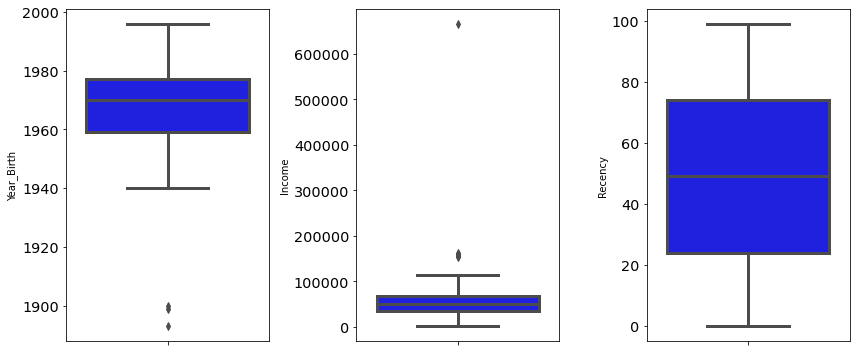

In [ ]:
plt.figure(figsize=(12,5))
for i in range(0, len(nums_int)):
    plt.subplot(1, len(nums_int), i+1)
    sns.boxplot(y=df[nums_int[i]], color='blue', orient='v')
    plt.tight_layout()

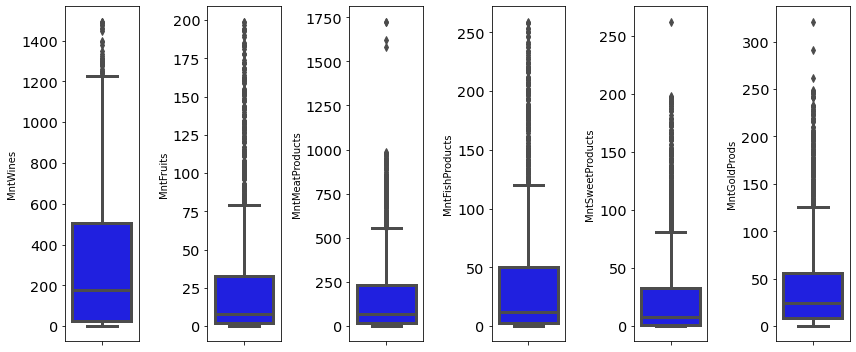

In [ ]:
plt.figure(figsize=(12,5))
for i in range(0, len(nums_product)):
    plt.subplot(1, len(nums_product), i+1)
    sns.boxplot(y=df[nums_product[i]], color='blue', orient='v')
    plt.tight_layout()

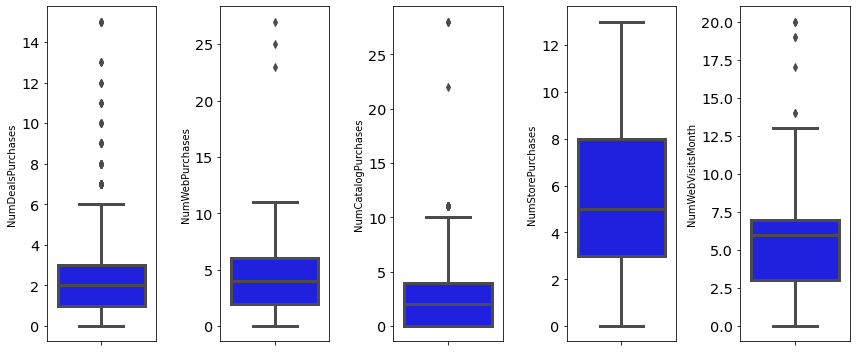

In [ ]:
plt.figure(figsize=(12,5))
for i in range(0, len(nums_purchase)):
    plt.subplot(1, len(nums_purchase), i+1)
    sns.boxplot(y=df[nums_purchase[i]], color='blue', orient='v')
    plt.tight_layout()

####**Kesimpulan**
Berdasarkan grafik yang telah ditampilkan di atas, terlihat bahwa adanya outliers pada fitur 'Income', 'Year_Birth', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumWebVisitsMonth'. Sehingga, kami melakukan perbaikan pada fitur tersebut dengan menggunakan metode Z-score dan juga IQR untuk meminimalisir jumlah outliers yang terkandung dalam dataset.

#### Remove Outliers berdasarkan Z-score

In [ ]:
df_z = pd.read_csv('https://drive.google.com/uc?export=download&id=1COZvOVdb_6kX_MkunW2-EsZdOymIFmeS', delimiter = ';')
df_z.dropna(inplace = True)

print(f'jumlah baris sebelum memfilter outlier: {len(df_z)}')

filtered_enteries = np.array([True] * len (df_z))

for col in ['Income', 'Year_Birth', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumWebVisitsMonth']:
    zscore = abs(stats.zscore(df_z[col]))
    filtered_enteries = (zscore < 3) & filtered_enteries

df_z = df_z[filtered_enteries]

print(f'jumlah baris sesudah memfilter outlier: {len(df_z)}')

jumlah baris sebelum memfilter outlier: 2216
jumlah baris sesudah memfilter outlier: 1953


#### Remove Outliers berdasarkan IQR

In [ ]:
df_iqr = pd.read_csv('https://drive.google.com/uc?export=download&id=1COZvOVdb_6kX_MkunW2-EsZdOymIFmeS', delimiter = ';')
df_iqr.dropna(inplace = True)

outliers = ['Year_Birth','Income','MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
            'MntGoldProds', 'NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth']

print(f'Jumlah baris sebelum filtering outlier: {len(df_iqr)}')

filtered_entries = np.array([True] * len(df_iqr))

for i in outliers:
    Q1 = df_iqr[i].quantile(0.25)
    Q3 = df_iqr[i].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_iqr[i] >= low_limit) & (df_iqr[i] <= high_limit)) & filtered_entries

df_iqr = df_iqr[filtered_entries]

print(f'Jumlah baris setelah filtering outlier: {len(df_iqr)}')

Jumlah baris sebelum filtering outlier: 2216
Jumlah baris setelah filtering outlier: 1506


####**Kesimpulan**
Berdasarkan hasil perhitungan menggunakan Z-score dan juga IQR, dapat diketahui bahwa jumlah baris yang dihapus berdasarkan IQR jauh lebih banyak dibandingkan dengan Z-score, yaitu sekitar >30% dari total baris data yang dihapus. Maka dari itu, kami memutuskan untuk memilih metode Z-score untuk melakukan penghapusan pada baris outliers.

Setelah itu, kami melakukan plotting boxplot untuk melihat kembali persebaran outliers pada masing-masing fitur.

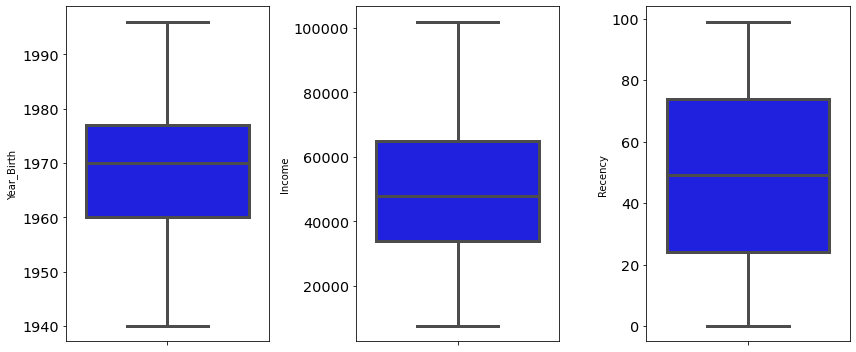

In [ ]:
plt.figure(figsize=(12,5))
for i in range(0, len(nums_int)):
    plt.subplot(1, len(nums_int), i+1)
    sns.boxplot(y=df_z[nums_int[i]], color='blue', orient='v')
    plt.tight_layout()

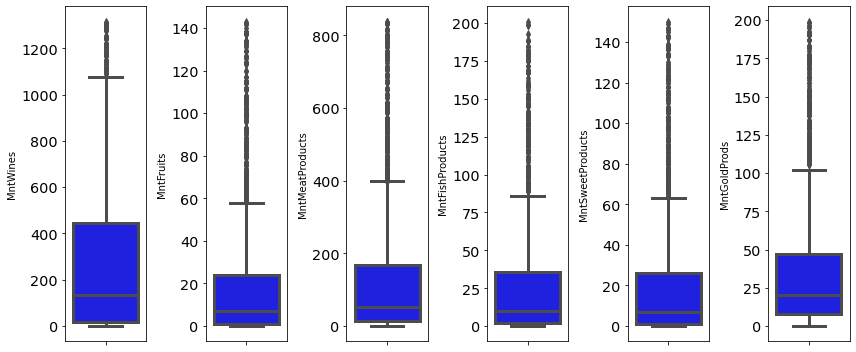

In [ ]:
plt.figure(figsize=(12,5))
for i in range(0, len(nums_product)):
    plt.subplot(1, len(nums_product), i+1)
    sns.boxplot(y=df_z[nums_product[i]], color='blue', orient='v')
    plt.tight_layout()

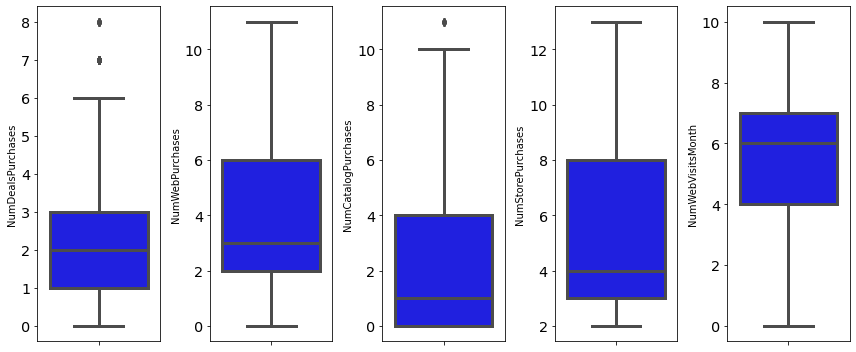

In [ ]:
plt.figure(figsize=(12,5))
for i in range(0, len(nums_purchase)):
    plt.subplot(1, len(nums_purchase), i+1)
    sns.boxplot(y=df_z[nums_purchase[i]], color='blue', orient='v')
    plt.tight_layout()

### Feature Transformation I

In [ ]:
df=df_z

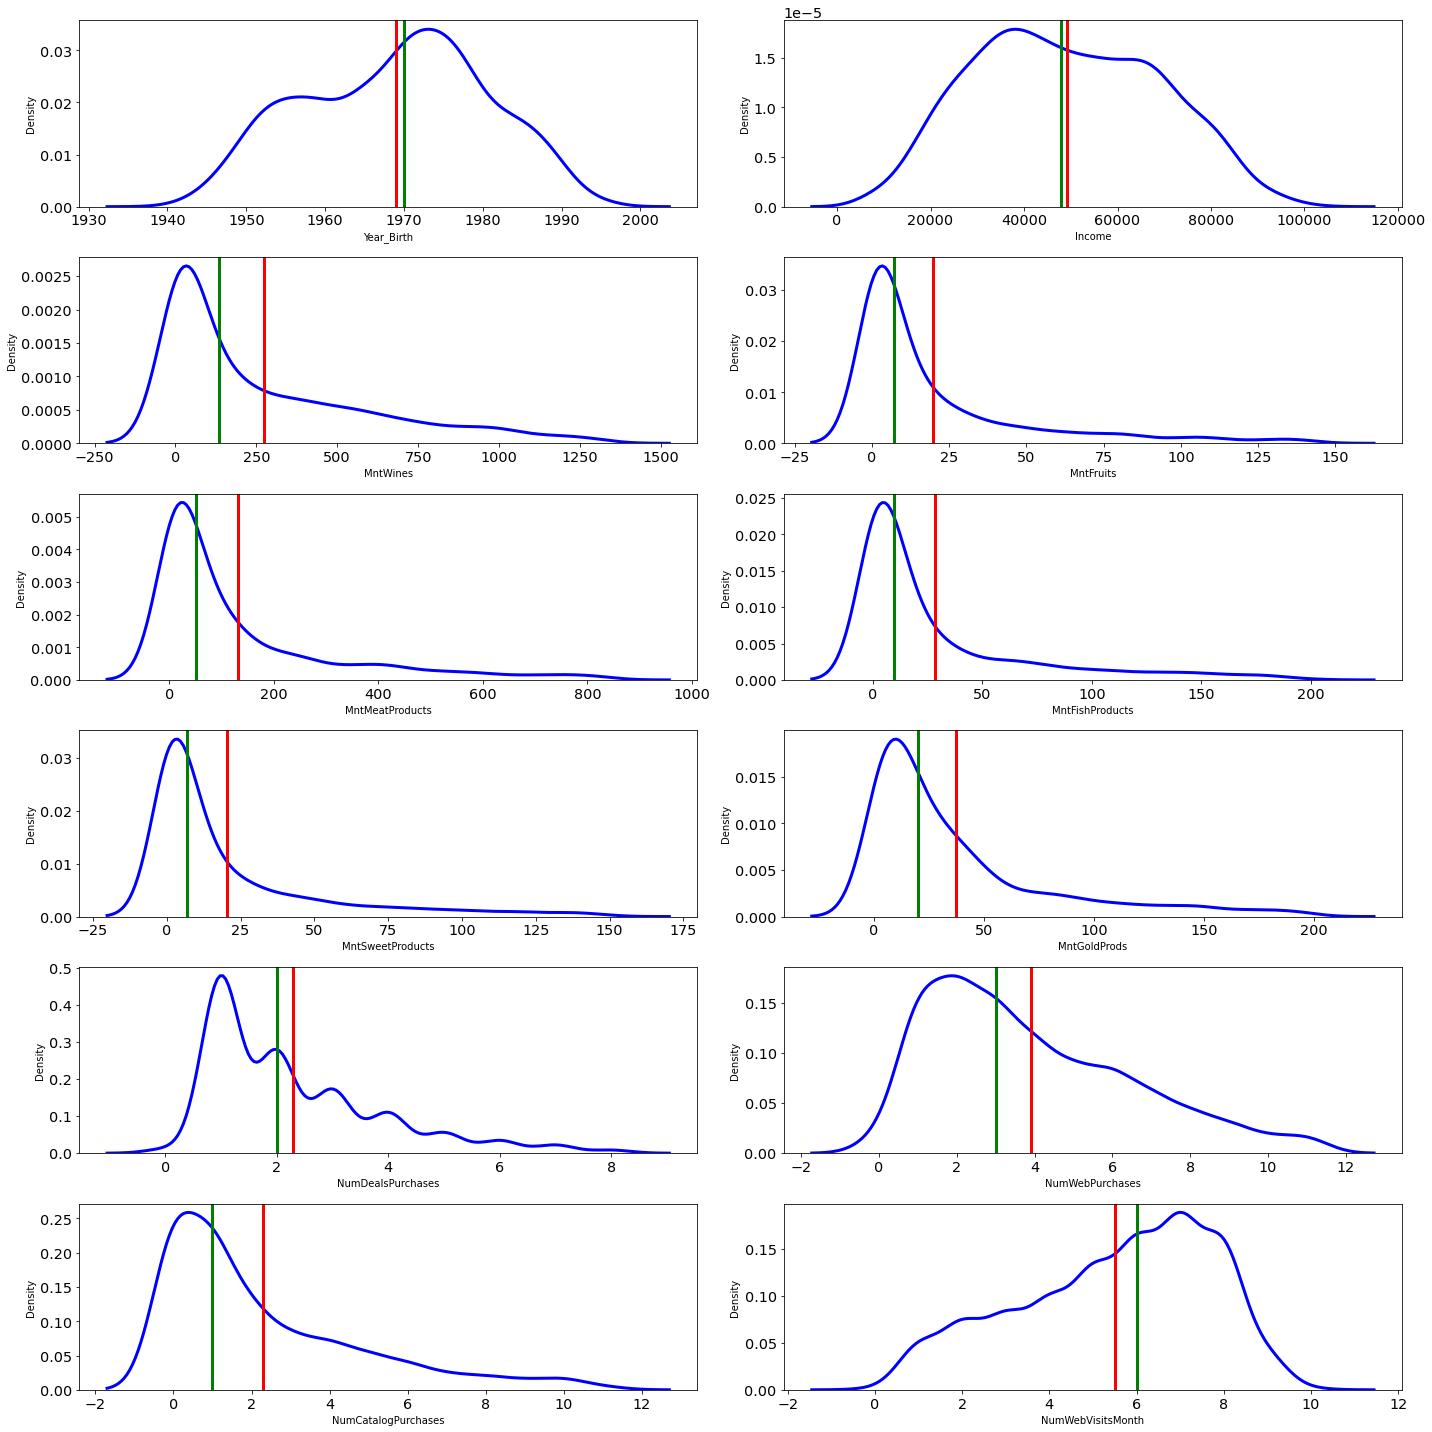

In [ ]:
#check the graph for each outlier column

plt.figure(figsize=(20,20))
for i in range(0, len(outliers)):
    plt.subplot(6, 2, i+1)
    sns.kdeplot(df[outliers[i]], color='blue')
    plt.tight_layout()

    # make a vertical line of mean and median
    plt.axvline(x=df[outliers[i]].mean(), color = 'red')
    plt.axvline(x=df[outliers[i]].median(), color = 'green')

####**Kesimpulan**
Berdasarkan grafik yang telah ditampilkan di atas, terlihat bahwa adanya positively skewed pada fitur 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases'. Sehingga, kami melakukan perbaikan pada feature tersebut dengan teknik feature transformation menggunakan metode log transformation.

In [ ]:
positive_skewed = ['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                   'NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases']

# check skewness value
for i in positive_skewed:
    skewness = df[i].skew(axis=0, skipna=True)
    print('skewness feature',i,'adalah', skewness)

skewness feature MntWines adalah 1.2704786643137906
skewness feature MntFruits adalah 2.108011346690099
skewness feature MntMeatProducts adalah 1.9170849507890875
skewness feature MntFishProducts adalah 1.965486056831826
skewness feature MntSweetProducts adalah 2.101542394722874
skewness feature MntGoldProds adalah 1.758032451602574
skewness feature NumDealsPurchases adalah 1.31591642250104
skewness feature NumWebPurchases adalah 0.7869758319537213
skewness feature NumCatalogPurchases adalah 1.348368752280952


#### Log Transformation

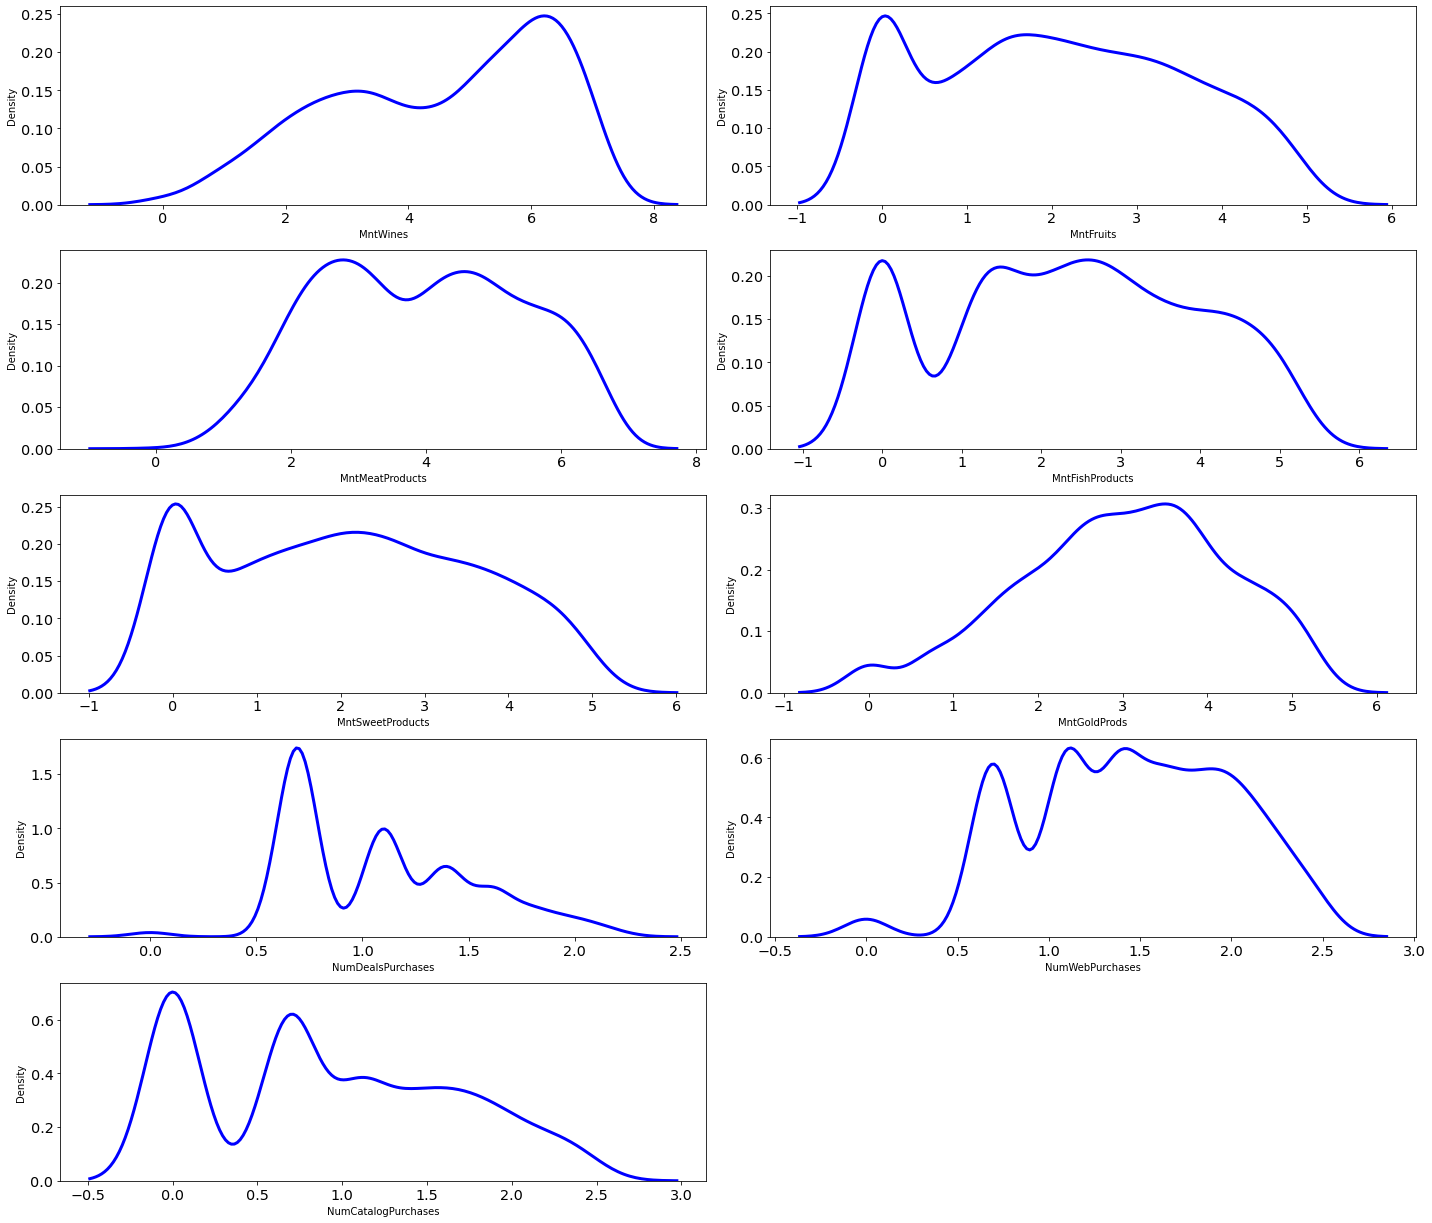

In [ ]:
# log transformation for positively skewed features
plt.figure(figsize=(20,20))
for i in range(0, len(positive_skewed)):
    plt.subplot(6, 2, i+1)
    sns.kdeplot(np.log(df[positive_skewed[i]]+1), color='blue') #plus 1 to prevent -inf
    plt.tight_layout()

In [ ]:
# check skewness value
for i in positive_skewed:
    skewness = np.log(df[i].skew(axis=0, skipna=True))
    print('skewness feature',i,'adalah', skewness)

skewness feature MntWines adalah 0.2393937304956276
skewness feature MntFruits adalah 0.745745013344942
skewness feature MntMeatProducts adalah 0.6508057775256199
skewness feature MntFishProducts adalah 0.6757395718998083
skewness feature MntSweetProducts adalah 0.7426715488131432
skewness feature MntGoldProds adalah 0.5641952584797426
skewness feature NumDealsPurchases adalah 0.27453332214854864
skewness feature NumWebPurchases adalah -0.2395577401166722
skewness feature NumCatalogPurchases adalah 0.2988955301853037


####**Kesimpulan**

Berdasarkan hasil pengecekan pada beberapa fitur yang telah diproses menggunakan log transformation sebelumnya, dapat diketahui bahwa keseluruhan nilai skewnessnya sudah memiliki rentang yang lebih seragam (tidak jauh dan tidak terlalu bervariasi). Sehingga dapat disimpulkan bahwa teknik fitur transformation yang telah kami lakukan sudah valid dan kami memutuskan untuk membuat kolom baru dengan isian nilai pada fitur yang sudah diolah tersebut.





In [ ]:
for i in positive_skewed:
    new_i = 'log_' + i
    df[new_i] = np.log(df[i]+1) #plus 1 to prevent -inf

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,log_MntWines,log_MntFruits,log_MntMeatProducts,log_MntFishProducts,log_MntSweetProducts,log_MntGoldProds,log_NumDealsPurchases,log_NumWebPurchases,log_NumCatalogPurchases
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,1,6.455199,4.488636,6.304449,5.153292,4.488636,4.488636,1.386294,2.197225,2.397895
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,0,2.484907,0.693147,1.945910,1.098612,0.693147,1.945910,1.098612,0.693147,0.693147
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,0,6.056784,3.912023,4.852030,4.718499,3.091042,3.761200,0.693147,2.197225,1.098612
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,0,2.484907,1.609438,3.044522,2.397895,1.386294,1.791759,1.098612,1.098612,0.000000
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,0,5.159055,3.784190,4.779123,3.850148,3.332205,2.772589,1.791759,1.791759,1.386294


### Feature Encoding

####**Penjelasan**
Setelah melakukan feature transformation, disini kami juga memutuskan untuk melakukan  feature encoding pada kolom yang memiliki tipe data categorical untuk diubah menjadi numerical. Hal ini kami lakukan dengan harapan agar kemampuan machine learning yang kami buat dapat meningkat. Berikut merupakan beberapa feature yang kami olah pada tahap ini:


1.   Mapping_marital, based on Marital_status
2.   Mapping_education, based on Education


#### Label Encoding

In [ ]:
mapping_marital = {
    'Absurd' : 0,
    'Alone' : 0,
    'Divorced' : 0,
    'Single' : 0,
    'Widow' : 0,
    'YOLO' : 0,
    'Together' : 1,
    'Married' : 1
}
df['Marital_Status'] = df['Marital_Status'].map(mapping_marital)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,log_MntWines,log_MntFruits,log_MntMeatProducts,log_MntFishProducts,log_MntSweetProducts,log_MntGoldProds,log_NumDealsPurchases,log_NumWebPurchases,log_NumCatalogPurchases
0,5524,1957,Graduation,0,58138.0,0,0,04/09/2012,58,635,...,1,6.455199,4.488636,6.304449,5.153292,4.488636,4.488636,1.386294,2.197225,2.397895
1,2174,1954,Graduation,0,46344.0,1,1,08/03/2014,38,11,...,0,2.484907,0.693147,1.945910,1.098612,0.693147,1.945910,1.098612,0.693147,0.693147
2,4141,1965,Graduation,1,71613.0,0,0,21/08/2013,26,426,...,0,6.056784,3.912023,4.852030,4.718499,3.091042,3.761200,0.693147,2.197225,1.098612
3,6182,1984,Graduation,1,26646.0,1,0,10/02/2014,26,11,...,0,2.484907,1.609438,3.044522,2.397895,1.386294,1.791759,1.098612,1.098612,0.000000
4,5324,1981,PhD,1,58293.0,1,0,19/01/2014,94,173,...,0,5.159055,3.784190,4.779123,3.850148,3.332205,2.772589,1.791759,1.791759,1.386294


In [ ]:
df['Education'].value_counts()

Graduation    958
PhD           440
Master        331
2n Cycle      171
Basic          53
Name: Education, dtype: int64

In [ ]:
mapping_education = {
    'Basic' : 0,
    'Graduation' : 1,
    'Master' : 2,
    '2n Cycle' : 2,
    'PhD' : 3
}
df['Education'] = df['Education'].map(mapping_education)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,log_MntWines,log_MntFruits,log_MntMeatProducts,log_MntFishProducts,log_MntSweetProducts,log_MntGoldProds,log_NumDealsPurchases,log_NumWebPurchases,log_NumCatalogPurchases
0,5524,1957,1,0,58138.0,0,0,04/09/2012,58,635,...,1,6.455199,4.488636,6.304449,5.153292,4.488636,4.488636,1.386294,2.197225,2.397895
1,2174,1954,1,0,46344.0,1,1,08/03/2014,38,11,...,0,2.484907,0.693147,1.945910,1.098612,0.693147,1.945910,1.098612,0.693147,0.693147
2,4141,1965,1,1,71613.0,0,0,21/08/2013,26,426,...,0,6.056784,3.912023,4.852030,4.718499,3.091042,3.761200,0.693147,2.197225,1.098612
3,6182,1984,1,1,26646.0,1,0,10/02/2014,26,11,...,0,2.484907,1.609438,3.044522,2.397895,1.386294,1.791759,1.098612,1.098612,0.000000
4,5324,1981,3,1,58293.0,1,0,19/01/2014,94,173,...,0,5.159055,3.784190,4.779123,3.850148,3.332205,2.772589,1.791759,1.791759,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974,1,1,34421.0,1,0,01/07/2013,81,3,...,0,1.386294,1.386294,2.079442,1.945910,1.098612,2.302585,0.693147,0.693147,0.000000
2236,4001,1946,3,1,64014.0,2,1,10/06/2014,56,406,...,0,6.008813,0.000000,3.433987,0.000000,0.000000,2.197225,2.079442,2.197225,1.098612
2237,7270,1981,1,0,56981.0,0,0,25/01/2014,91,908,...,0,6.812345,3.891820,5.384495,3.496508,2.564949,3.218876,0.693147,1.098612,1.386294
2238,8235,1956,2,1,69245.0,0,1,24/01/2014,8,428,...,0,6.061457,3.433987,5.370638,4.394449,3.433987,4.127134,1.098612,1.945910,1.791759


#### One Hot Encoding

In [ ]:
#menggabungkan value pada kolom education
df.Education = df.Education.apply(lambda x : "Master" if (x=="2n Cycle") else x)

#One Hot Encoding
prefix_educ = pd.get_dummies(df['Education'], prefix='is')

df = df.join(prefix_educ)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,log_MntFishProducts,log_MntSweetProducts,log_MntGoldProds,log_NumDealsPurchases,log_NumWebPurchases,log_NumCatalogPurchases,is_0,is_1,is_2,is_3
0,5524,1957,1,0,58138.0,0,0,04/09/2012,58,635,...,5.153292,4.488636,4.488636,1.386294,2.197225,2.397895,0,1,0,0
1,2174,1954,1,0,46344.0,1,1,08/03/2014,38,11,...,1.098612,0.693147,1.945910,1.098612,0.693147,0.693147,0,1,0,0
2,4141,1965,1,1,71613.0,0,0,21/08/2013,26,426,...,4.718499,3.091042,3.761200,0.693147,2.197225,1.098612,0,1,0,0
3,6182,1984,1,1,26646.0,1,0,10/02/2014,26,11,...,2.397895,1.386294,1.791759,1.098612,1.098612,0.000000,0,1,0,0
4,5324,1981,3,1,58293.0,1,0,19/01/2014,94,173,...,3.850148,3.332205,2.772589,1.791759,1.791759,1.386294,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974,1,1,34421.0,1,0,01/07/2013,81,3,...,1.945910,1.098612,2.302585,0.693147,0.693147,0.000000,0,1,0,0
2236,4001,1946,3,1,64014.0,2,1,10/06/2014,56,406,...,0.000000,0.000000,2.197225,2.079442,2.197225,1.098612,0,0,0,1
2237,7270,1981,1,0,56981.0,0,0,25/01/2014,91,908,...,3.496508,2.564949,3.218876,0.693147,1.098612,1.386294,0,1,0,0
2238,8235,1956,2,1,69245.0,0,1,24/01/2014,8,428,...,4.394449,3.433987,4.127134,1.098612,1.945910,1.791759,0,0,1,0


In [ ]:
df['Marital_Status'].value_counts()

1    1271
0     682
Name: Marital_Status, dtype: int64

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,log_MntFishProducts,log_MntSweetProducts,log_MntGoldProds,log_NumDealsPurchases,log_NumWebPurchases,log_NumCatalogPurchases,is_0,is_1,is_2,is_3
0,5524,1957,1,0,58138.0,0,0,04/09/2012,58,635,...,5.153292,4.488636,4.488636,1.386294,2.197225,2.397895,0,1,0,0
1,2174,1954,1,0,46344.0,1,1,08/03/2014,38,11,...,1.098612,0.693147,1.945910,1.098612,0.693147,0.693147,0,1,0,0
2,4141,1965,1,1,71613.0,0,0,21/08/2013,26,426,...,4.718499,3.091042,3.761200,0.693147,2.197225,1.098612,0,1,0,0
3,6182,1984,1,1,26646.0,1,0,10/02/2014,26,11,...,2.397895,1.386294,1.791759,1.098612,1.098612,0.000000,0,1,0,0
4,5324,1981,3,1,58293.0,1,0,19/01/2014,94,173,...,3.850148,3.332205,2.772589,1.791759,1.791759,1.386294,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974,1,1,34421.0,1,0,01/07/2013,81,3,...,1.945910,1.098612,2.302585,0.693147,0.693147,0.000000,0,1,0,0
2236,4001,1946,3,1,64014.0,2,1,10/06/2014,56,406,...,0.000000,0.000000,2.197225,2.079442,2.197225,1.098612,0,0,0,1
2237,7270,1981,1,0,56981.0,0,0,25/01/2014,91,908,...,3.496508,2.564949,3.218876,0.693147,1.098612,1.386294,0,1,0,0
2238,8235,1956,2,1,69245.0,0,1,24/01/2014,8,428,...,4.394449,3.433987,4.127134,1.098612,1.945910,1.791759,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 0 to 2239
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1953 non-null   int64  
 1   Year_Birth               1953 non-null   int64  
 2   Education                1953 non-null   int64  
 3   Marital_Status           1953 non-null   int64  
 4   Income                   1953 non-null   float64
 5   Kidhome                  1953 non-null   int64  
 6   Teenhome                 1953 non-null   int64  
 7   Dt_Customer              1953 non-null   object 
 8   Recency                  1953 non-null   int64  
 9   MntWines                 1953 non-null   int64  
 10  MntFruits                1953 non-null   int64  
 11  MntMeatProducts          1953 non-null   int64  
 12  MntFishProducts          1953 non-null   int64  
 13  MntSweetProducts         1953 non-null   int64  
 14  MntGoldProds            

### Feature Extraction

####**Penjelasan**

Setelah melakukan feature encoding, disini kami juga memutuskan untuk melakukan feature extraction. Hal ini kami lakukan dengan tujuan untuk mempermudah tahapan feature selection yang akan dilakukan selanjutnya. Berikut merupakan beberapa feature yang kami ciptakan pada tahap ini:

1. primer_purcahase & tersier_purchase, yaitu sebuah fitur yang menggabungkan kolom pembelian buah, daging dan ikan, wine, makanan manis, dan gold ke dalam 2 golongan, yaitu primer dan tersier.
2. total_accepted_campaign, yaitu sebuah fitur yang menggabungkan acceptedcmp 1 - 5. Fitur ini dibuat untuk melihat intensitas customer dalam accepting campaign
dari keseluruhan campaign yang telah dilakukan oleh perusahaan.
3. total_revenue, yaitu sebuah fitur yang dibuat dengan menjumlahkan total acceptence customer pada keseluruhan campaign sebelumnya (1-5) dengan jumlah revenue per accepted campaign.
4. total_spent, yaitu sebuah fitur yang menggabungkan total pembelian pada keseluruhan produk darimulai wines, fruits, meat, fish, sweet, sampai dengan gold untuk merekap total pengeluaran yang telah dilakukan oleh masing-masing customer.
5. total_order, yaitu sebuah fitur yang berisikan summary dari total purchases atau order yang telah dilakukan oleh pelanggan dari berbagai metode purchases.
6. month_customer, yaitu fitur bulan dimana customer mulai enroll/ register ke marketing campaign.
7. age_category, yaitu sebuah fitur yang mengkategorisasikan customer ke dalam  3 kelompok umur, yaitu: Elderly (2), Middle Age (1), dan Young (0).
8. income_category, yaitu sebuah fitur yang mengkategorisasikan customer berdasarkan pendapatannya ke dalam 3 kategori, yaitu High-Income (2), Mid-Income (1), dan Low-Income (0)
9. total_dependents, yaitu sebuah fitur yang menggabungkan kolom marital status, kidhome, dan teen home untuk melihat jumlah orang dalam 1 rumah yang dianggap sebagai tanggungan rumah tangga.

Keseluruhan fitur tersebut nantinya akan diuji ulang saat feature selection untuk melihat seberapa besar pengaruhnya terhadap target atau probabilitas response yang diberikan customer dalam sebuah campaign



---


*tidak perlu diinput dulu ya*

Untuk tambahan feature extraction ini nanti baru ditambahkan setelah kita modelling ya. Semisal kita perlu meningkatkan performance ML, bisa dicoba dengan feature di bawah ni.
10. **_total_spent_cats, yaitu sebuah fitur turunan dari total_spent yang mengkategorisasikan customer berdasarkan jumlah pembelian yang telah mereka lakukan ke dalam 3 kategori (low, mid, high)_**
11. **_average_total_spent, yaitu sebuah fitur turunan juga dari total spent yang mengkategorisasikan customer berdasarkan [rata-rata] jumlah pembelian yang telah mereka lakukan ke dalam 3 kategori (low, mid, high)_**


**_kalo nambah fitur kyk nomor 10 dan 11 itu gimana gaiss? tapi aku codingnya nub hehe, tulung bantuannya semisal oke :'D_**



---



In [ ]:
# primer and tertier product
df['primer_purchase'] = df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']
df['tersier_purchase'] = df['MntWines']+df['MntSweetProducts']+df["MntGoldProds"]
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,log_MntGoldProds,log_NumDealsPurchases,log_NumWebPurchases,log_NumCatalogPurchases,is_0,is_1,is_2,is_3,primer_purchase,tersier_purchase
2198,2632,1954,1,1,50501.0,1,1,18/06/2013,10,297,...,5.030438,2.079442,1.791759,1.609438,0,1,0,0,51,449
562,9780,1971,2,1,71499.0,0,1,25/06/2013,12,465,...,3.637586,1.098612,2.197225,1.386294,0,0,1,0,293,502
1665,6437,1985,2,0,41473.0,1,0,19/06/2013,80,21,...,2.302585,0.693147,1.098612,0.000000,0,0,1,0,43,33
1678,4065,1976,3,1,49544.0,1,0,12/02/2013,0,308,...,3.178054,1.098612,1.791759,0.693147,0,0,0,1,73,331
597,7444,1969,2,1,42169.0,1,1,19/10/2013,20,19,...,1.098612,1.098612,0.693147,0.000000,0,0,1,0,9,21


In [ ]:
# total accepted campaign
df['total_accepted_campaign'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,log_NumDealsPurchases,log_NumWebPurchases,log_NumCatalogPurchases,is_0,is_1,is_2,is_3,primer_purchase,tersier_purchase,total_accepted_campaign
328,10350,1950,3,1,54432.0,2,1,09/05/2013,37,33,...,0.693147,0.693147,0.000000,0,0,0,1,5,33,0
1711,7832,1959,2,1,77520.0,0,1,28/08/2013,30,940,...,0.693147,2.197225,2.079442,0,0,1,0,440,1086,3
1787,8008,1983,1,1,36075.0,1,0,09/12/2013,54,46,...,0.693147,1.098612,0.000000,0,1,0,0,42,77,0
318,113,1951,1,1,30833.0,1,1,16/07/2013,33,11,...,1.098612,0.693147,0.000000,0,1,0,0,10,18,0
245,7411,1964,3,1,31686.0,1,1,05/06/2014,31,11,...,1.098612,0.693147,0.000000,0,0,0,1,5,12,0


In [ ]:
# total revenue
df['total_revenue'] = (df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] +
                       df['AcceptedCmp4'] + df['AcceptedCmp5']) * df['Z_Revenue']
df[['Z_Revenue', 'total_revenue']].sample(5)

,Z_Revenue,total_revenue
1104,11,0
636,11,0
1433,11,0
729,11,11
1429,11,0


In [ ]:
# total spent
df["total_spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,log_NumCatalogPurchases,is_0,is_1,is_2,is_3,primer_purchase,tersier_purchase,total_accepted_campaign,total_revenue,total_spent
1668,5299,1970,3,1,69084.0,1,0,19/11/2013,43,1181,...,1.386294,0,0,0,1,345,1241,0,0,1586
1210,5644,1957,1,1,42213.0,0,1,12/10/2013,96,309,...,0.693147,0,1,0,0,31,332,1,11,363
1712,2202,1978,1,1,41154.0,0,1,09/04/2013,98,44,...,0.000000,0,1,0,0,15,54,0,0,69
1617,940,1987,1,0,57100.0,1,0,18/05/2014,9,158,...,1.098612,0,1,0,0,125,186,0,0,311
797,796,1965,2,0,60161.0,0,1,23/10/2012,17,584,...,1.609438,0,0,1,0,302,769,0,0,1071


In [ ]:
# total purchase
df['total_order'] = df['NumDealsPurchases']+df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,is_0,is_1,is_2,is_3,primer_purchase,tersier_purchase,total_accepted_campaign,total_revenue,total_spent,total_order
1279,907,1975,1,1,46149.0,0,1,29/11/2013,36,254,...,0,1,0,0,81,281,0,0,362,18
1760,2118,1964,2,1,62905.0,0,1,10/09/2013,68,166,...,0,0,1,0,290,332,0,0,622,20
1129,4756,1952,2,0,63998.0,0,0,20/12/2013,42,176,...,0,0,1,0,847,321,0,0,1168,25
1498,9463,1959,1,1,71706.0,0,1,13/11/2012,16,931,...,0,1,0,0,400,1043,0,0,1443,25
769,8786,1956,2,1,62058.0,0,1,26/05/2013,52,301,...,0,0,1,0,91,359,0,0,450,18


In [ ]:
# convert the date of enrolment to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# creating features from date of enrolment
df['month_customer'] = df['Dt_Customer'].apply(lambda x: x.month)

# Check the result
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,is_1,is_2,is_3,primer_purchase,tersier_purchase,total_accepted_campaign,total_revenue,total_spent,total_order,month_customer
1760,2118,1964,2,1,62905.0,0,1,2013-10-09,68,166,...,0,1,0,290,332,0,0,622,20,10
1431,10033,1973,2,0,31163.0,1,0,2014-02-13,54,2,...,0,1,0,24,14,0,0,38,5,2
1065,4415,1961,1,1,16860.0,1,1,2012-12-09,19,10,...,1,0,0,11,27,0,0,38,8,12
1850,4427,1995,2,0,83257.0,0,0,2012-09-18,56,536,...,0,1,0,655,710,2,22,1365,28,9
1101,10552,1979,2,1,54210.0,0,1,2013-05-20,18,70,...,0,1,0,243,124,0,0,367,14,5


In [ ]:
# Age_category customer menurut WHO
df['age'] = 2023 - df['Year_Birth']

age_category=[]
for i in df['age']:
  if i <= 25 :
    age_category.append(0) #Young
  elif i <=45 :
    age_category.append(1) #Middle-Age
  else :
    age_category.append(2) #Elderly
df['age_category'] = age_category
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,is_3,primer_purchase,tersier_purchase,total_accepted_campaign,total_revenue,total_spent,total_order,month_customer,age,age_category
0,5524,1957,1,0,58138.0,0,0,2012-04-09,58,635,...,0,806,811,0,0,1617,25,4,66,2
1,2174,1954,1,0,46344.0,1,1,2014-08-03,38,11,...,0,9,18,0,0,27,6,8,69,2
2,4141,1965,1,1,71613.0,0,0,2013-08-21,26,426,...,0,287,489,0,0,776,21,8,58,2
3,6182,1984,1,1,26646.0,1,0,2014-10-02,26,11,...,0,34,19,0,0,53,8,10,39,1
4,5324,1981,3,1,58293.0,1,0,2014-01-19,94,173,...,1,207,215,0,0,422,19,1,42,1


In [ ]:
df['age_category'].value_counts()

2    1466
1     487
Name: age_category, dtype: int64

In [ ]:
# Income
Income_category=[]
for i in df['Income']:
  if i >= df['Income'].quantile(0.75)  :
    Income_category.append(2) # High-Income
  elif i >= df['Income'].quantile(0.50) :
    Income_category.append(1) # Mid-Income
  else :
    Income_category.append(0) # Low-Income
df['Income_category'] = Income_category
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,primer_purchase,tersier_purchase,total_accepted_campaign,total_revenue,total_spent,total_order,month_customer,age,age_category,Income_category
0,5524,1957,1,0,58138.0,0,0,2012-04-09,58,635,...,806,811,0,0,1617,25,4,66,2,1
1,2174,1954,1,0,46344.0,1,1,2014-08-03,38,11,...,9,18,0,0,27,6,8,69,2,0
2,4141,1965,1,1,71613.0,0,0,2013-08-21,26,426,...,287,489,0,0,776,21,8,58,2,2
3,6182,1984,1,1,26646.0,1,0,2014-10-02,26,11,...,34,19,0,0,53,8,10,39,1,0
4,5324,1981,3,1,58293.0,1,0,2014-01-19,94,173,...,207,215,0,0,422,19,1,42,1,1


In [ ]:
# jumlah tanggungan
df['total_dependents'] = df['Marital_Status'] + df['Kidhome'] + df['Teenhome']
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,tersier_purchase,total_accepted_campaign,total_revenue,total_spent,total_order,month_customer,age,age_category,Income_category,total_dependents
1019,4436,1976,1,0,20180.0,0,0,2013-02-20,27,18,...,56,0,0,137,8,2,47,2,0,0
331,663,1989,3,0,33996.0,0,0,2013-11-09,46,40,...,46,0,0,71,6,11,34,1,0,0
2189,1646,1972,0,1,25224.0,1,0,2014-03-16,36,4,...,14,0,0,46,7,3,51,2,0,2
1037,67,1972,2,0,46423.0,1,1,2013-09-18,6,68,...,76,0,0,92,9,9,51,2,0,2
1150,1453,1943,3,0,57513.0,0,0,2013-06-07,59,735,...,785,0,0,1060,27,6,80,2,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 0 to 2239
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       1953 non-null   int64         
 1   Year_Birth               1953 non-null   int64         
 2   Education                1953 non-null   int64         
 3   Marital_Status           1953 non-null   int64         
 4   Income                   1953 non-null   float64       
 5   Kidhome                  1953 non-null   int64         
 6   Teenhome                 1953 non-null   int64         
 7   Dt_Customer              1953 non-null   datetime64[ns]
 8   Recency                  1953 non-null   int64         
 9   MntWines                 1953 non-null   int64         
 10  MntFruits                1953 non-null   int64         
 11  MntMeatProducts          1953 non-null   int64         
 12  MntFishProducts          1953 non-

### Feature Selection

####**Penjelasan**
Setelah melakukan feature extraction, pada tahap inilah saatnya kami untuk menyeleksi beberapa fitur yang kami anggap kurang penting khususnya yang memiliki korelasi rendah dengan target maupun fitur lainnya. Hal ini kami lakukan guna mempermudah tahap pembelajaran ML yang kami ciptakan nantinya.

Gambar di bawah ini menunjukkan heatmap sebelum melakukan feature selection. Gambar setelahnya menunjukkan heatmap setelah melakukan feature selection. Kami membuat threshold 0.19 dimana di atas angka threshold, maka korelasi fitur dengan target cukup tinggi sehingga fitur tersebut diambil. Sementara itu, fitur-target dengan korelasi <0.19 tidak diambil.

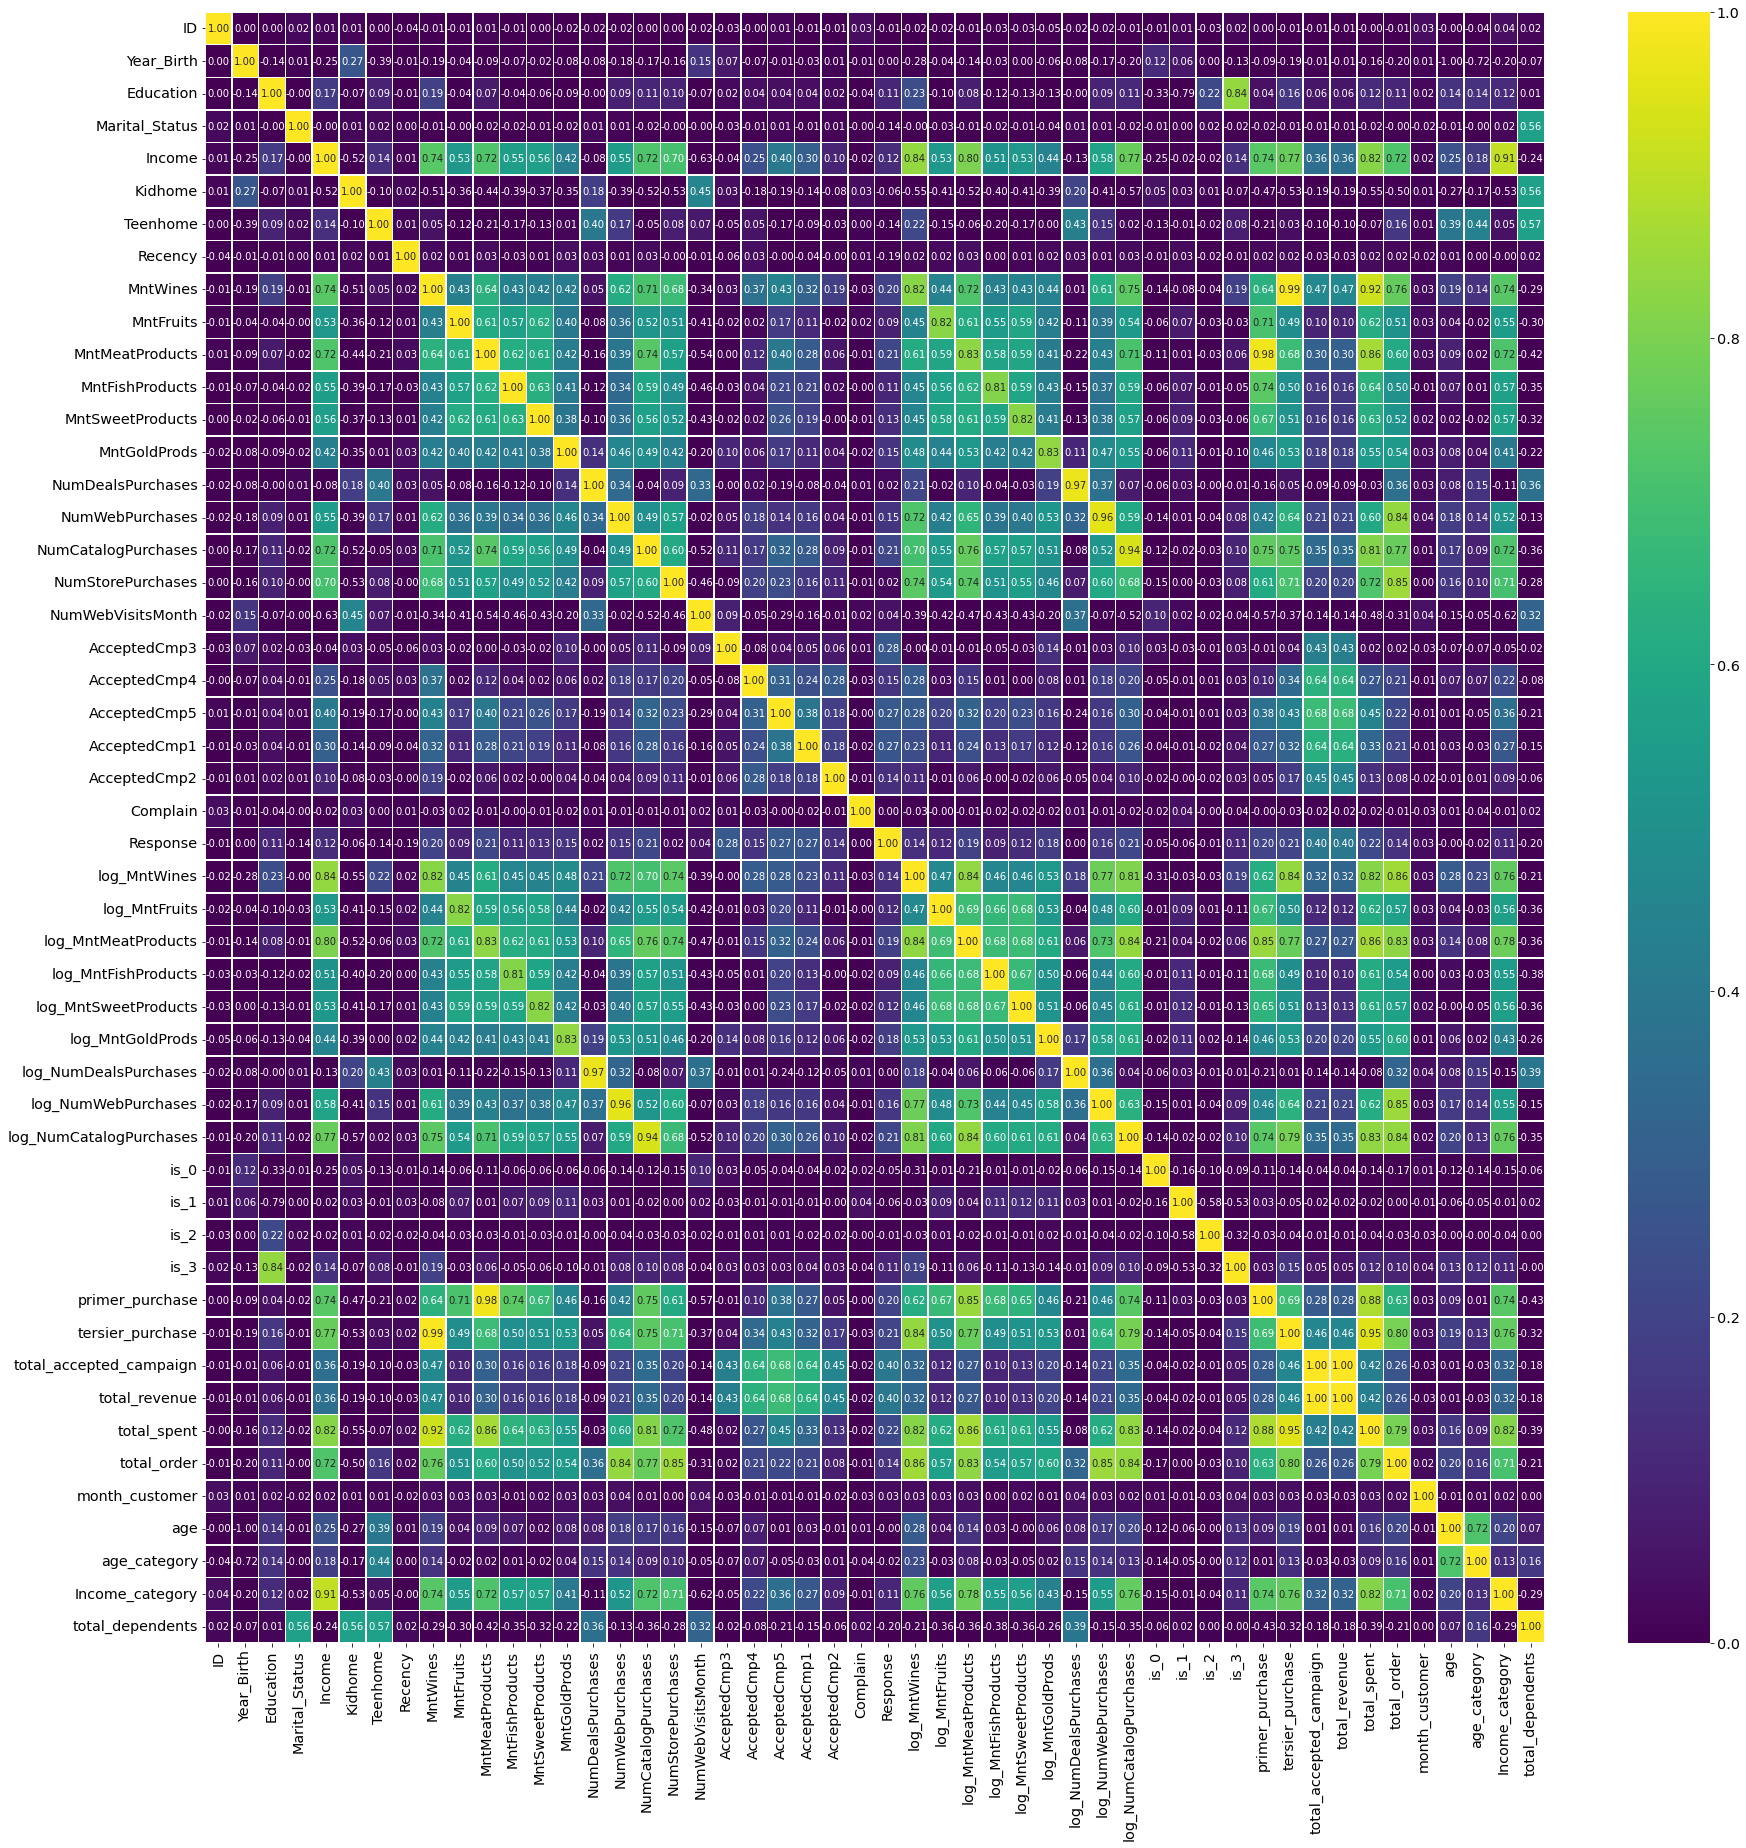

In [ ]:
df_for_corr = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

#heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(df_for_corr.corr(), annot=True, linewidths=.5, fmt='.2f', vmin=0, vmax=1, cmap='viridis')
plt.show()

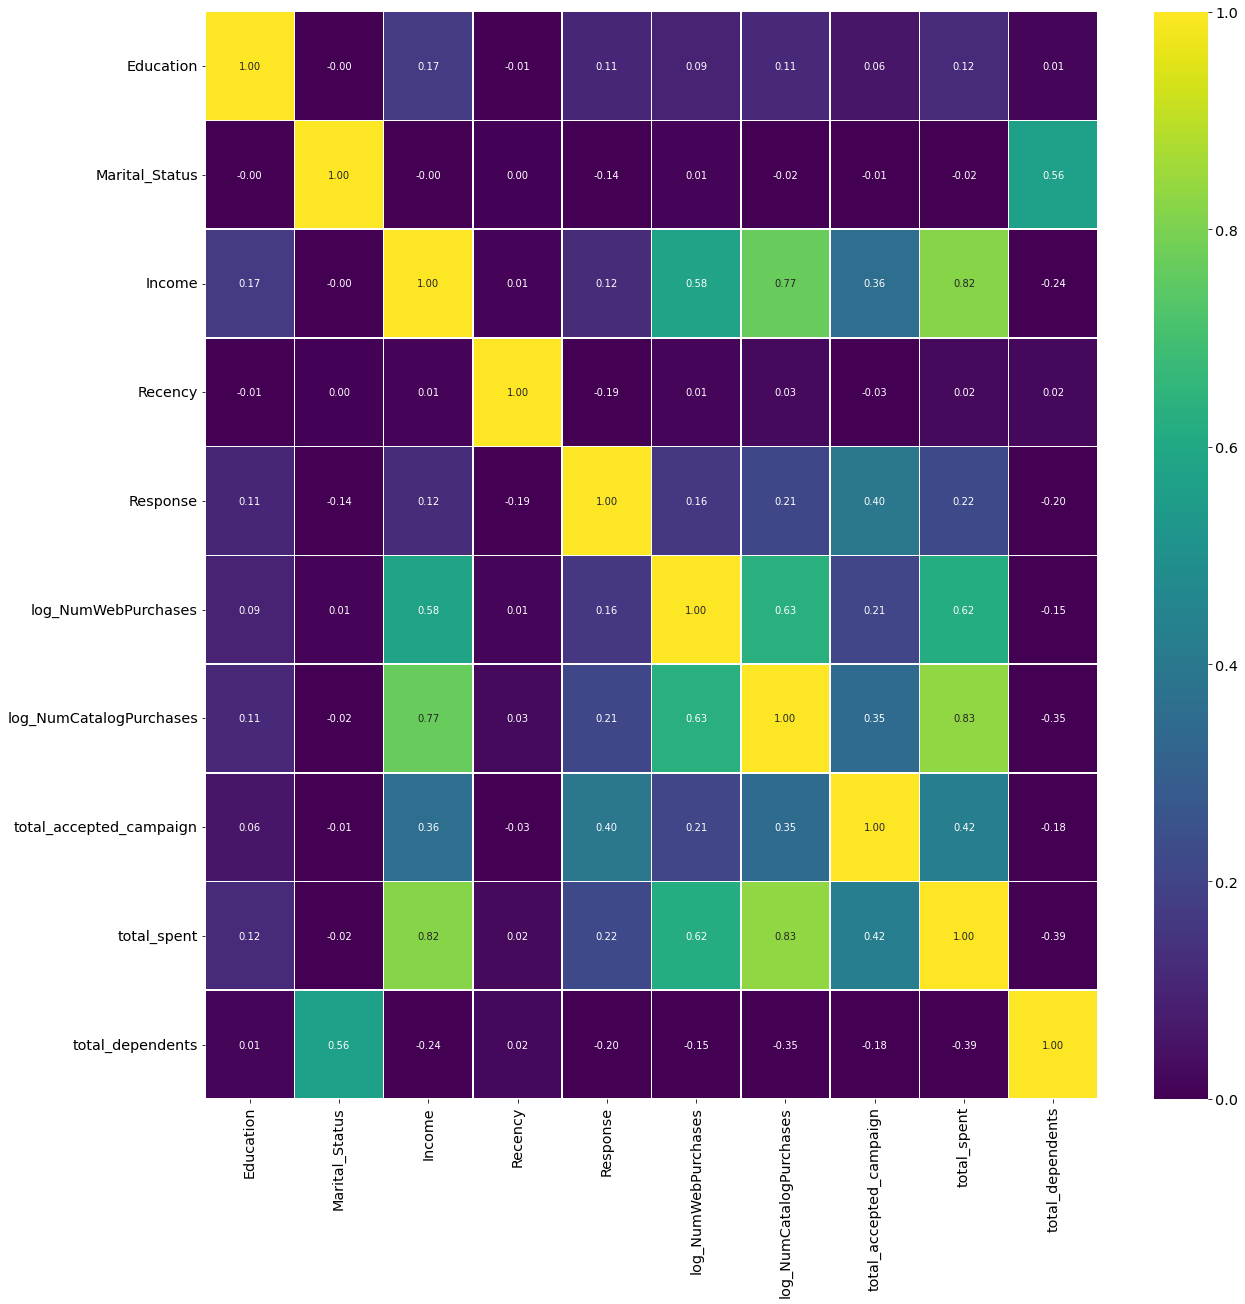

In [ ]:
df_for_corr = df.drop(['Dt_Customer','ID','Year_Birth','is_0','is_1','is_2','is_3','Kidhome','Teenhome', 'age', 'month_customer',
                        'NumDealsPurchases','NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'total_order', 'primer_purchase','tersier_purchase',
                        'MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                        'Z_CostContact', 'Z_Revenue','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain',
                       'log_MntFruits', 'log_MntFishProducts', 'log_MntSweetProducts','log_MntMeatProducts','log_MntWines','log_MntGoldProds',
                       'log_NumDealsPurchases',
                       'age_category','Income_category','total_revenue','NumCatalogPurchases'], axis=1)

#heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df_for_corr.corr(), annot=True, linewidths=.5, fmt='.2f', vmin=0, vmax=1, cmap='viridis')
plt.show()

# Machine Learning Evaluation & Supervised Learning

## Split dataset

In [ ]:
X = df_for_corr.drop(['Response'], axis=1)
y = df_for_corr['Response']

In [ ]:
X.describe()

,Education,Marital_Status,Income,Recency,log_NumWebPurchases,log_NumCatalogPurchases,total_accepted_campaign,total_spent,total_dependents
count,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000,1953.000000
mean,1.680492,0.650794,49183.513057,49.154634,1.446477,0.915257,0.252432,510.168459,1.660522
std,0.850092,0.476841,19583.157030,28.980502,0.552888,0.741833,0.609249,539.563867,0.882992
min,0.000000,0.000000,7500.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000
25%,1.000000,0.000000,33996.000000,24.000000,1.098612,0.000000,0.000000,62.000000,1.000000
50%,1.000000,1.000000,48006.000000,49.000000,1.386294,0.693147,0.000000,275.000000,2.000000
75%,2.000000,1.000000,64813.000000,74.000000,1.945910,1.609438,0.000000,895.000000,2.000000
max,3.000000,1.000000,101970.000000,99.000000,2.484907,2.484907,4.000000,2440.000000,4.000000


Setelah dilakukan berbagai pengolahan pada tahap preprocessing, selanjutnya kami membagi data menjadi dua jenis, yaitu data training (70%) untuk melatih ML dalam belajar dan data test (30%) untuk menguji keakuratan ML kami.

In [ ]:
# split train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
y_train.describe()

count    1367.000000
mean        0.133870
std         0.340637
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Response, dtype: float64

In [ ]:
y_test.describe()

count    586.000000
mean       0.133106
std        0.339979
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Response, dtype: float64

## Class Imbalance

Dikarenakan dataset kami cenderung imbalance, maka kami melakukan perbaikan pada dataset dengan menggunakan metode SMOTE untuk meminimalisir gap class imbalance yang terjadi.

In [ ]:
#use oversampling
from imblearn import under_sampling, over_sampling
#x_under, y_under = under_sampling.RandomUnderSampler(sampling_strategy=1).fit_resample(x,y)
#X_train, y_train = over_sampling.RandomOverSampler(sampling_strategy=0.5).fit_resample(X_train,y_train)
X_train, y_train = over_sampling.SMOTE(sampling_strategy=0.5).fit_resample(X_train,y_train)

In [ ]:
print(pd.Series(y_train).value_counts())

0    1184
1     592
Name: Response, dtype: int64


## Define function

In [ ]:
# define function to find evaluation model score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

# define function to see the feature importance for decision tree model

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

# define function to see the best tuning hyperparameter

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

## Modelling

### Default Modelling

Pada tahap awal modelling ini, kami memutuskan untuk menggunakan 6 jenis metode dengan harapan agar output comparing yang dihasilkan lebih kaya dan decision yang dipilih lebih akurat.

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg = LogisticRegression(random_state = 42) # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Train Set): 0.77
Accuracy (Test Set): 0.86
Precision (Train Set): 0.74
Precision (Test Set): 0.48
Recall (Train Set): 0.48
Recall (Test Set): 0.55
F1-Score (Train Set): 0.58
F1-Score (Test Set): 0.51
roc_auc (train-proba): 0.82
roc_auc (test-proba): 0.83
roc_auc (crossval train): 0.7784601900331328
roc_auc (crossval test): 0.7638769177771648


#### KNN

In [ ]:
# K-Nearest Neighbor

from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train) # fit model KNN dari data train
eval_classification(knn)

Accuracy (Train Set): 0.84
Accuracy (Test Set): 0.78
Precision (Train Set): 0.77
Precision (Test Set): 0.27
Recall (Train Set): 0.75
Recall (Test Set): 0.37
F1-Score (Train Set): 0.76
F1-Score (Test Set): 0.32
roc_auc (train-proba): 0.91
roc_auc (test-proba): 0.66
roc_auc (crossval train): 0.8956035044915073
roc_auc (crossval test): 0.6258676156375192


#### Decision Tree

In [ ]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier(random_state = 42) # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.82
Precision (Train Set): 1.00
Precision (Test Set): 0.38
Recall (Train Set): 0.98
Recall (Test Set): 0.58
F1-Score (Train Set): 0.99
F1-Score (Test Set): 0.46
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.72
roc_auc (crossval train): 0.999787030566532
roc_auc (crossval test): 0.6717274588452369


#### Random Forest

In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.87
Precision (Train Set): 1.00
Precision (Test Set): 0.51
Recall (Train Set): 0.98
Recall (Test Set): 0.58
F1-Score (Train Set): 0.99
F1-Score (Test Set): 0.54
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.85
roc_auc (crossval train): 0.999716215361506
roc_auc (crossval test): 0.833368927783676


#### Adaboost

In [ ]:
#Adaboost

from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=42)
clf.fit(X_train, y_train)
eval_classification(clf)

Accuracy (Train Set): 0.85
Accuracy (Test Set): 0.86
Precision (Train Set): 0.80
Precision (Test Set): 0.48
Recall (Train Set): 0.74
Recall (Test Set): 0.58
F1-Score (Train Set): 0.77
F1-Score (Test Set): 0.52
roc_auc (train-proba): 0.93
roc_auc (test-proba): 0.81
roc_auc (crossval train): 0.9083336678564009
roc_auc (crossval test): 0.8360316487271625


#### XGBoost

In [ ]:
# XGBoost

from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)
eval_classification(xg)

Accuracy (Train Set): 0.93
Accuracy (Test Set): 0.87
Precision (Train Set): 0.91
Precision (Test Set): 0.52
Recall (Train Set): 0.86
Recall (Test Set): 0.59
F1-Score (Train Set): 0.89
F1-Score (Test Set): 0.55
roc_auc (train-proba): 0.97
roc_auc (test-proba): 0.84
roc_auc (crossval train): 0.9458101365002204
roc_auc (crossval test): 0.8521498220869652


#### **Kesimpulan**
Berdasarkan hasil modelling 6 metode di atas, dapat diketahui bahwa nilai precision dan recall pada dataset train yang paling baik dihasilkan oleh Decision Tree, Random Forest, dan XGBoost dengan masing-masing nilai yang didapatkan sebagai berikut:

* Decision Tree: Precision 1.00, Recall 0.98
* Random Forest: Precision 1.00, Recall 0.98
* XGBoost: Precision 0.89, Recall 0.83

### Hyperparameter Tuning

Kemudian, pada tahap selanjutnya kami melakukan hyperparameter tuning dari ketiga model yang telah kami pilih berdasarkan nilai precision dan recall tertinggi sebelumnya. Hal ini kami lakukan dengan menganalisa output learning curve agar output akhir modelling dari ketiga jenis metode tersebut dapat memberikan hasil yang lebih optimal.

#### Decision Tree

In [ ]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier(random_state = 42) # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.82
Precision (Train Set): 1.00
Precision (Test Set): 0.38
Recall (Train Set): 0.98
Recall (Test Set): 0.58
F1-Score (Train Set): 0.99
F1-Score (Test Set): 0.46
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.72
roc_auc (crossval train): 0.999787030566532
roc_auc (crossval test): 0.6717274588452369


In [ ]:
#default hyperparameter
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

#List of Hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num=30)]
min_samples_split = [2, 5, 10, 100]
min_samples_leaf = [1, 2, 4, 10, 20, 50]
max_features = ['auto', 'sqrt']
criterion = ['gini', 'entropy']
splitter = ['best', 'random']

hyperparameters = dict(max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter)

#inisiasi model
dt = DecisionTreeClassifier(random_state=42)
model= RandomizedSearchCV(dt, hyperparameters, cv=5, scoring='precision')
model.fit(X_train, y_train)

#Predict & Evaluation
y_pred = model.predict(X_test)
eval_classification(model)

Accuracy (Train Set): 0.88
Accuracy (Test Set): 0.85
Precision (Train Set): 0.84
Precision (Test Set): 0.44
Recall (Train Set): 0.78
Recall (Test Set): 0.53
F1-Score (Train Set): 0.81
F1-Score (Test Set): 0.48
roc_auc (train-proba): 0.95
roc_auc (test-proba): 0.82
roc_auc (crossval train): 0.8283343265761953
roc_auc (crossval test): 0.763210844635283


params values: 95; train: 0.8556691985482104; test: 0.8009287300625882
params values: 96; train: 0.8555193971420745; test: 0.7993766404199475
params values: 97; train: 0.8554159628378378; test: 0.7989980819705229
params values: 98; train: 0.8550093590211834; test: 0.79772360185746
params values: 99; train: 0.8546027552045288; test: 0.7963860286694933
params values: 100; train: 0.8541961513878744; test: 0.7955405814657783
params values: 101; train: 0.8534713979181885; test: 0.7959191399152029
params values: 102; train: 0.8457024116599707; test: 0.7835655158489803
params values: 103; train: 0.8456232309167275; test: 0.7766631334544719
params values: 104; train: 0.8431015739134405; test: 0.7824550777306682
params values: 105; train: 0.8417519345781591; test: 0.7919442761962447
params values: 106; train: 0.8346641880478451; test: 0.791300726832223
params values: 107; train: 0.8339865150200877; test: 0.7928401978598829
params values: 108; train: 0.8339708215394448; test: 0.7927771047849789


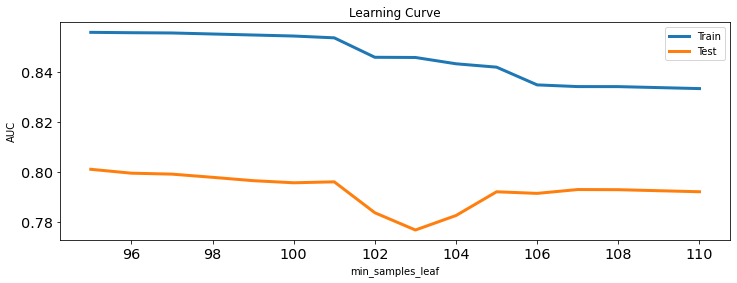

In [ ]:
#Analyze Learning Curve for min_samples_leaf
import numpy as np
from matplotlib import pyplot as plt


def draw_learning_curve(params_values):
    train_scores = []
    test_scores = []

    for i in params_values:
        model = DecisionTreeClassifier(random_state = 42, min_samples_leaf=i)
        model.fit(X_train, y_train)

        #Eval on Train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:, 1])
        train_scores.append(train_auc)

        #Eval on Test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
        test_scores.append(test_auc)

        print('params values: ' + str(i) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))

    plt.plot(params_values, train_scores, label='Train')
    plt.plot(params_values, test_scores, label='Test')
    plt.xlabel('min_samples_leaf')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

params_values = [int(x) for x in np.linspace(95, 110, 15)]
draw_learning_curve(params_values)

Berdasarkan output learning curve diatas, terlihat bahwa min_sample_leaf 98 menunjukkan hasil perbandingan yang lebih baik dibandingkan dengan yang lainnya, kemudian dilanjut ke pencarian hyperparameter terbaik selanjutnya..

params values: 1; train: 0.6566722972972974; test: 0.6973803755299818
params values: 2; train: 0.7465467209185537; test: 0.7490536038764386
params values: 3; train: 0.7972758970964208; test: 0.7731803957197658
params values: 4; train: 0.8282676680058435; test: 0.788978901675752
params values: 5; train: 0.8554159628378378; test: 0.7989980819705229
params values: 6; train: 0.8554159628378378; test: 0.7989980819705229
params values: 7; train: 0.8554159628378378; test: 0.7989980819705229
params values: 8; train: 0.8554159628378378; test: 0.7989980819705229
params values: 9; train: 0.8554159628378378; test: 0.7989980819705229
params values: 10; train: 0.8554159628378378; test: 0.7989980819705229


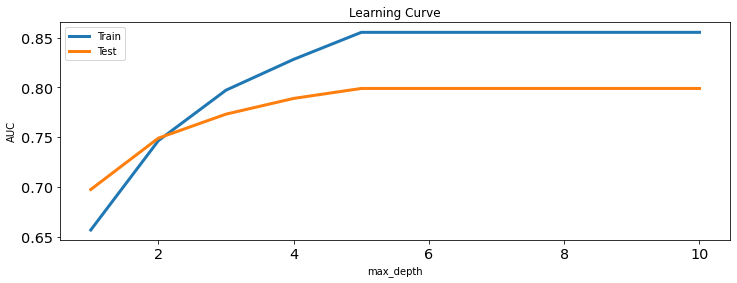

In [ ]:
#Analyze Learning Curve for max_depth
import numpy as np
from matplotlib import pyplot as plt


def draw_learning_curv(max_depths):
    train_scores = []
    test_scores = []

    for c in max_depths:
        model = DecisionTreeClassifier(random_state = 42, min_samples_leaf = 97, max_depth=c)
        model.fit(X_train, y_train)

        #Eval on Train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:, 1])
        train_scores.append(train_auc)

        #Eval on Test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
        test_scores.append(test_auc)

        print('params values: ' + str(c) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))

    plt.plot(max_depths, train_scores, label='Train')
    plt.plot(max_depths, test_scores, label='Test')
    plt.xlabel('max_depth')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

max_depths = [int(x) for x in np.linspace(1, 10, num=10)]
draw_learning_curv(max_depths)

Berdasarkan output learning curve diatas, terlihat bahwa max_depth 2.5 menunjukkan hasil perbandingan yang lebih baik dibandingkan dengan yang lainnya, kemudian dilanjut ke pencarian hyperparameter terbaik selanjutnya..

param values: 2; train: 0.7465467209185537; test: 0.7490536038764386
param values: 2; train: 0.7465467209185537; test: 0.7490536038764386
param values: 3; train: 0.7465467209185537; test: 0.7490536038764386
param values: 4; train: 0.7465467209185537; test: 0.7490536038764386
param values: 5; train: 0.7465467209185537; test: 0.7490536038764386
param values: 6; train: 0.7465467209185537; test: 0.7490536038764386
param values: 7; train: 0.7465467209185537; test: 0.7490536038764386
param values: 8; train: 0.7465467209185537; test: 0.7490536038764386
param values: 9; train: 0.7465467209185537; test: 0.7490536038764386
param values: 10; train: 0.7465467209185537; test: 0.7490536038764386
param values: 11; train: 0.7465467209185537; test: 0.7490536038764386
param values: 12; train: 0.7465467209185537; test: 0.7490536038764386
param values: 13; train: 0.7465467209185537; test: 0.7490536038764386
param values: 14; train: 0.7465467209185537; test: 0.7490536038764386
param values: 15; train: 0.74

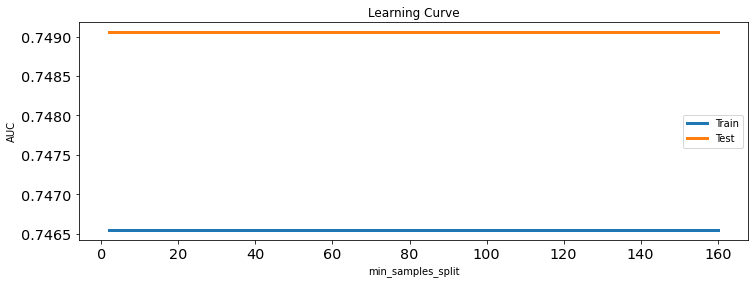

In [ ]:
#Analyze Learning Curve for min_samples_split
import numpy as np
from matplotlib import pyplot as plt


def draw_learning_curves(param_values):
    train_scores = []
    test_scores = []

    for a in param_values:
        model = DecisionTreeClassifier(random_state = 42, min_samples_leaf = 97, max_depth=2.5, min_samples_split=a)
        model.fit(X_train, y_train)

        #Eval on Train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:, 1])
        train_scores.append(train_auc)

        #Eval on Test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
        test_scores.append(test_auc)

        print('param values: ' + str(a) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('min_samples_split')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(2, 160, 160)]
draw_learning_curves(param_values)

Berdasarkan output learning curve diatas, terlihat bahwa min_sample_split 80 menunjukkan hasil perbandingan yang lebih baik dibandingkan dengan yang lainnya.

##### Tuning

Kemudian dikarenakan seluruh hyperparameter optimal yang dicari sudah ditemukan semua, tahap selanjutnya adalah melakukan running ulang menggunakan hyperparameter optimal tersebut untuk melihat perubahan output yang dihasilkan oleh model Decision Tree ini.

In [ ]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier(random_state = 42, min_samples_leaf = 97, max_depth=2.5, min_samples_split=80, splitter = 'best', criterion = 'gini')
# secara default criterion = gini, splitter = best, max_features = none
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Train Set): 0.74
Accuracy (Test Set): 0.87
Precision (Train Set): 0.80
Precision (Test Set): 0.51
Recall (Train Set): 0.28
Recall (Test Set): 0.31
F1-Score (Train Set): 0.41
F1-Score (Test Set): 0.38
roc_auc (train-proba): 0.75
roc_auc (test-proba): 0.75
roc_auc (crossval train): 0.7655472367552162
roc_auc (crossval test): 0.7495058735482255


#### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.87
Precision (Train Set): 1.00
Precision (Test Set): 0.51
Recall (Train Set): 0.98
Recall (Test Set): 0.58
F1-Score (Train Set): 0.99
F1-Score (Test Set): 0.54
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.85
roc_auc (crossval train): 0.999716215361506
roc_auc (crossval test): 0.833368927783676


param value: 1; train: 0.932979564234843; test: 0.669240864122754
param value: 23; train: 0.9998245183528123; test: 0.848198061780739
param value: 45; train: 0.9998559053140978; test: 0.8447910357359174
param value: 67; train: 0.9998915723155588; test: 0.8454598223299011
param value: 89; train: 0.9998929989956173; test: 0.8476176054916212
param value: 111; train: 0.999898705715851; test: 0.8516177064405411
param value: 133; train: 0.9999001323959094; test: 0.8499268120331113
param value: 155; train: 0.9999029857560263; test: 0.847213809812235
param value: 177; train: 0.9999086924762599; test: 0.8461790833838079
param value: 200; train: 0.9999101191563183; test: 0.8483242479305474


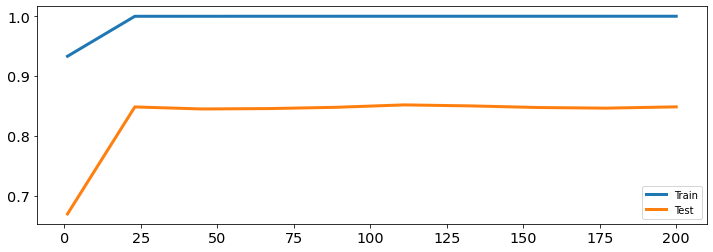

In [ ]:
#learning curve
param_values = [int(x) for x in np.linspace(1, 200, 10)] # n_estimators
# param_values = [int(x) for x in np.linspace(2, 100, 50)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(random_state=42, n_estimators=c) #cek param n estimator
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Berdasarkan output learning curve diatas, terlihat bahwa n_estimator 23 menunjukkan hasil perbandingan yang lebih baik dibandingkan yang lainnya, kemudian dilanjut ke pencarian hyperparameter terbaik selanjutnya..

param value: 2; train: 0.8342632909514245; test: 0.8290556228548354
param value: 4; train: 0.9068520589846604; test: 0.8473021401171007
param value: 6; train: 0.9554918622169466; test: 0.8583560468402989
param value: 8; train: 0.9853258822589481; test: 0.83944074298405
param value: 10; train: 0.9966344617421476; test: 0.8258000201897839
param value: 12; train: 0.9993337404127101; test: 0.8460528972339997
param value: 14; train: 0.9996304898648649; test: 0.8498511003432263
param value: 16; train: 0.9998173849525201; test: 0.8488542297597416
param value: 18; train: 0.9998380718133674; test: 0.8500277609529577
param value: 20; train: 0.9998209516526662; test: 0.8495734908136483


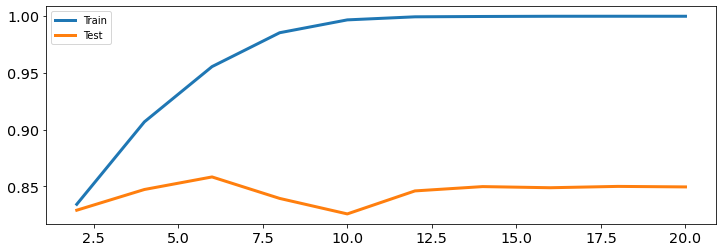

In [ ]:
#learning curve
# param_values = [int(x) for x in np.linspace(1, 200, 10)] # n_estimators
param_values = [int(x) for x in np.linspace(2, 20, 10)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(random_state=42, n_estimators= 23, max_depth = c) # cek param max_depth
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Berdasarkan output learning curve diatas, terlihat bahwa max_depth 2 menunjukkan hasil perbandingan yang lebih baik dibandingkan yang lainnya, kemudian dilanjut ke pencarian hyperparameter terbaik selanjutnya..

param value: 2; train: 0.8342632909514245; test: 0.8290556228548354
param value: 3; train: 0.8342632909514245; test: 0.8290556228548354
param value: 4; train: 0.8342632909514245; test: 0.8290556228548354
param value: 5; train: 0.8342632909514245; test: 0.8290556228548354
param value: 7; train: 0.8342632909514245; test: 0.8290556228548354
param value: 8; train: 0.8342632909514245; test: 0.8290556228548354
param value: 9; train: 0.8342632909514245; test: 0.8290556228548354
param value: 11; train: 0.8342632909514245; test: 0.8290556228548354
param value: 12; train: 0.8342632909514245; test: 0.8290556228548354
param value: 13; train: 0.8342632909514245; test: 0.8290556228548354
param value: 14; train: 0.8342632909514245; test: 0.8290556228548354
param value: 16; train: 0.8342632909514245; test: 0.8290556228548354
param value: 17; train: 0.8342632909514245; test: 0.8290556228548354
param value: 18; train: 0.8342632909514245; test: 0.8290556228548354
param value: 20; train: 0.834263290951424

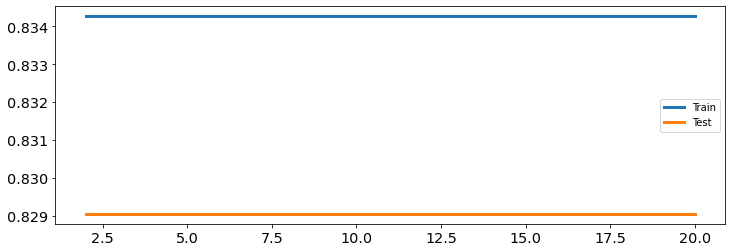

In [ ]:
#learning curve
# param_values = [int(x) for x in np.linspace(1, 200, 10)] # n_estimators
# param_values = [int(x) for x in np.linspace(2, 20, 10)] # max_depth
param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(random_state=42, n_estimators= 23, max_depth = 2, min_samples_split = c) # cek param min_sample_split
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Berdasarkan output learning curve diatas, terlihat bahwa keseluruhan parameter learning curve untuk min_sample_split menunjukkan hasil perbandingan relatif sama, sehingga kami pilih secara acak dengan mengambil kisaran nilai tengah (11). kemudian dilanjut ke pencarian hyperparameter terbaik selanjutnya..

param value: 2; train: 0.8342632909514245; test: 0.8290556228548354
param value: 3; train: 0.8342632909514245; test: 0.8290556228548354
param value: 4; train: 0.8342632909514245; test: 0.8290556228548354
param value: 5; train: 0.8342632909514245; test: 0.8290556228548354
param value: 7; train: 0.8342632909514245; test: 0.8290556228548354
param value: 8; train: 0.8342632909514245; test: 0.8290556228548354
param value: 9; train: 0.8338994875365231; test: 0.8286518271754492
param value: 11; train: 0.8338994875365231; test: 0.8286518271754492
param value: 12; train: 0.8336890522279036; test: 0.82650666262871
param value: 13; train: 0.8336890522279036; test: 0.82650666262871
param value: 14; train: 0.8336890522279036; test: 0.82650666262871
param value: 16; train: 0.833827440193572; test: 0.8298758328285888
param value: 17; train: 0.833827440193572; test: 0.8298758328285888
param value: 18; train: 0.8327674169101534; test: 0.8292701393095093
param value: 20; train: 0.8327674169101534; test:

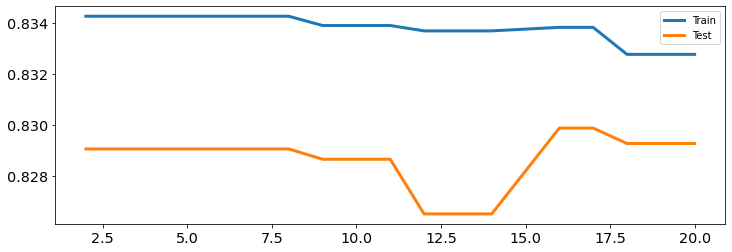

In [ ]:
#learning curve
# param_values = [int(x) for x in np.linspace(1, 200, 10)] # n_estimators
# param_values = [int(x) for x in np.linspace(2, 20, 10)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(random_state=42, n_estimators= 23, max_depth = 2, min_samples_split = 11, min_samples_leaf = c) # cek param min_sample_leaf
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Berdasarkan output learning curve diatas, terlihat bahwa output learning curve untuk min_sample_leaf juga tergolong cenderung sama (stabil) dari ujung sampai ke ujung seperti min_sample_split, sehingga kami pilih secara acak dengan mengambil nilai tengah (11). Kemudian dilanjut ke tuning hyperparameter

##### **Tuning**

Kemudian dikarenakan seluruh hyperparameter optimal yang dicari sudah ditemukan semua, tahap selanjutnya adalah melakukan running ulang menggunakan hyperparameter optimal tersebut untuk melihat perubahan output yang dihasilkan oleh model Random Forest ini.

In [ ]:
# tuning hyperparameter RF
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [23]
criterion = ['gini', 'entropy']
max_depth = [2]
min_samples_split = [11]
min_samples_leaf = [11]

hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rfs = RandomForestClassifier(random_state=42)
rss = RandomizedSearchCV(rfs, hyperparameters, scoring='precision', random_state=42, cv=5)
rss.fit(X_train, y_train)
eval_classification(rss)

Accuracy (Train Set): 0.77
Accuracy (Test Set): 0.88
Precision (Train Set): 0.87
Precision (Test Set): 0.58
Recall (Train Set): 0.36
Recall (Test Set): 0.32
F1-Score (Train Set): 0.51
F1-Score (Test Set): 0.41
roc_auc (train-proba): 0.83
roc_auc (test-proba): 0.83
roc_auc (crossval train): 0.8231186475351364
roc_auc (crossval test): 0.8025751872161118


#### XGBoost

In [ ]:
# XGBoost

from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
eval_classification(xg)

Accuracy (Train Set): 0.93
Accuracy (Test Set): 0.87
Precision (Train Set): 0.91
Precision (Test Set): 0.52
Recall (Train Set): 0.86
Recall (Test Set): 0.59
F1-Score (Train Set): 0.89
F1-Score (Test Set): 0.55
roc_auc (train-proba): 0.97
roc_auc (test-proba): 0.84
roc_auc (crossval train): 0.9458101365002204
roc_auc (crossval test): 0.8521498220869652


param value: 1; train: 0.8872152346603361; test: 0.833636180092873
param value: 2; train: 0.9495504531135865; test: 0.8405385624873813
param value: 3; train: 0.9726747968407597; test: 0.8422168382798304
param value: 4; train: 0.9878603793827612; test: 0.8386836260852009
param value: 5; train: 0.9948639517896276; test: 0.8443872400565313
param value: 6; train: 0.9985633331811541; test: 0.842797294568948
param value: 7; train: 0.9994022210555149; test: 0.8460528972339998
param value: 8; train: 0.9997717311906501; test: 0.8419897032101756
param value: 9; train: 0.9998744521548575; test: 0.8406521300222087
param value: 10; train: 0.9999029857560262; test: 0.8407278417120937


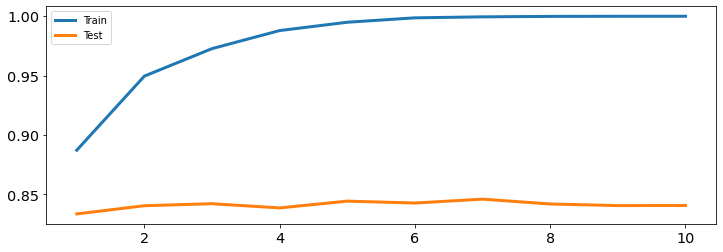

In [ ]:
#learning curve
param_values = [int(x) for x in np.linspace(1, 10, 10)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = XGBClassifier(max_depth=c, random_state=42)
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Berdasarkan output learning curve diatas, terlihat bahwa max_depth 1 menunjukkan hasil perbandingan yang lebih baik dibandingkan yang lainnya, kemudian dilanjut ke pencarian hyperparameter terbaik selanjutnya..

param value: 0.0; train: 0.8872152346603361; test: 0.833636180092873
param value: 11.11111111111111; train: 0.8872152346603361; test: 0.833636180092873
param value: 22.22222222222222; train: 0.8588300082176773; test: 0.8302670098929942
param value: 33.33333333333333; train: 0.8482233553232286; test: 0.8267590349283263
param value: 44.44444444444444; train: 0.8362506562728269; test: 0.8187966888754291
param value: 55.55555555555556; train: 0.8327909571311176; test: 0.8268852210781343
param value: 66.66666666666666; train: 0.8313771171932067; test: 0.8269609327680193
param value: 77.77777777777777; train: 0.8283554088294376; test: 0.8273521098324248
param value: 88.88888888888889; train: 0.8191697292731922; test: 0.8108595800524935
param value: 100.0; train: 0.8043429567658875; test: 0.803187462144155


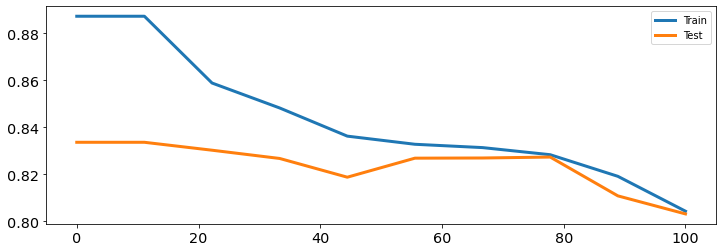

In [ ]:
#learning curve
#param_values = [int(x) for x in np.linspace(1, 20, 10)] # max_depth
param_values= [float(x) for x in np.linspace(0, 100, num = 10)]
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = XGBClassifier(max_depth=1, gamma=c, random_state=42)
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Berdasarkan output learning curve diatas, terlihat bahwa gamma 66.66 menunjukkan hasil perbandingan yang lebih baik dibandingkan yang lainnya, kemudian dilanjut ke pencarian hyperparameter terbaik selanjutnya..

param value: auto; train: 0.8313771171932067; test: 0.8269609327680193
param value: exact; train: 0.8313771171932067; test: 0.8269609327680193
param value: approx; train: 0.8284709699141709; test: 0.8230491621239653
param value: hist; train: 0.8309890602173119; test: 0.8269609327680193


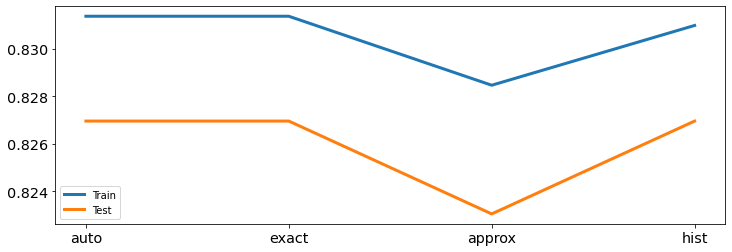

In [ ]:
#learning curve
#param_values = [int(x) for x in np.linspace(1, 20, 10)] # max_depth
#param_values= [float(x) for x in np.linspace(0, 10, num = 10)]
param_values=['auto', 'exact', 'approx', 'hist']
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = XGBClassifier(max_depth=1, gamma=66.66, tree_method=c, random_state=42)
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Berdasarkan output learning curve diatas, terlihat bahwa tree_method auto dan exact menunjukkan hasil perbandingan yang lebih baik dibandingkan yang lainnya, sehingga kami pilih auto yang notabenenya merupakan parameter default. Kemudian dilanjut ke pencarian hyperparameter terbaik selanjutnya..

param value: 1; train: 0.8313771171932067; test: 0.8269609327680193
param value: 3; train: 0.8313771171932067; test: 0.8269609327680193
param value: 5; train: 0.8313771171932067; test: 0.8269609327680193
param value: 7; train: 0.8313771171932067; test: 0.8269609327680193
param value: 9; train: 0.8313771171932067; test: 0.8269609327680193
param value: 11; train: 0.8313771171932067; test: 0.8269609327680193
param value: 13; train: 0.8313771171932067; test: 0.8269609327680193
param value: 15; train: 0.8313771171932067; test: 0.8269609327680193
param value: 17; train: 0.8313771171932067; test: 0.8269609327680193
param value: 20; train: 0.8313771171932067; test: 0.8269609327680193


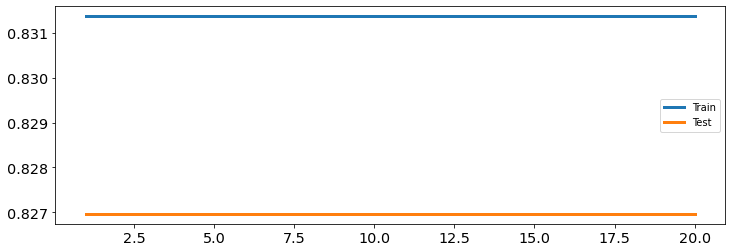

In [ ]:
#learning curve
#param_values = [int(x) for x in np.linspace(1, 20, 10)] # max_depth
#param_values= [float(x) for x in np.linspace(0, 10, num = 10)]
#param_values=[float(x) for x in np.linspace(0, 100, num = 10)]
param_values= [int(x) for x in np.linspace(1, 20, num = 10)]
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = XGBClassifier(max_depth=1, gamma=66.66, tree_method='auto', min_child_weight=c, random_state=42)
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Berdasarkan output learning curve diatas, terlihat bahwa keseluruhan parameter learning curve untuk min_child_weight menunjukkan hasil perbandingan relatif sama, sehingga kami pilih secara acak dengan mengambil kisaran nilai tengah (11). kemudian dilanjut ke pencarian hyperparameter terbaik selanjutnya..

##### **Tuning**

Kemudian dikarenakan seluruh hyperparameter optimal yang dicari sudah ditemukan semua, tahap selanjutnya adalah melakukan running ulang menggunakan hyperparameter optimal tersebut untuk melihat perubahan output yang dihasilkan oleh model XGBoost ini.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [1],
                    'gamma' : [66.66],
                    'tree_method' : ['auto'],
                    'min_child_weight' : [11],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 5)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 5)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 5)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 5)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv= 7, random_state=42, scoring='precision', n_iter=20)
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(xg_tuned.best_estimator_)

Accuracy (Train Set): 0.73
Accuracy (Test Set): 0.88
Precision (Train Set): 0.87
Precision (Test Set): 0.59
Recall (Train Set): 0.22
Recall (Test Set): 0.21
F1-Score (Train Set): 0.35
F1-Score (Test Set): 0.30
roc_auc (train-proba): 0.83
roc_auc (test-proba): 0.83
roc_auc (crossval train): 0.7155573571343407
roc_auc (crossval test): 0.7094945845819242


## Model Selection

Dari ketiga model di atas: Decision Tree, Random Forest, dan XGBoost, kami membandingkan nilai metric precision, recall, serta gap antara nilai train dan test pada masing-masing metric. Dari hasil perbandingan tersebut, kami dapatkan bahwasanya model yang paling optimal untuk studi kasus kami adalah Random Forest.

### Random Forest

In [ ]:
# tuning hyperparameter RF
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [23]
criterion = ['gini', 'entropy']
max_depth = [2]
min_samples_split = [11]
min_samples_leaf = [11]

hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rfs = RandomForestClassifier(random_state=42)
rss = RandomizedSearchCV(rfs, hyperparameters, scoring='precision', random_state=42, cv=5)
rss.fit(X_train, y_train)
eval_classification(rss)

Accuracy (Train Set): 0.77
Accuracy (Test Set): 0.88
Precision (Train Set): 0.87
Precision (Test Set): 0.58
Recall (Train Set): 0.36
Recall (Test Set): 0.32
F1-Score (Train Set): 0.51
F1-Score (Test Set): 0.41
roc_auc (train-proba): 0.83
roc_auc (test-proba): 0.83
roc_auc (crossval train): 0.8231186475351364
roc_auc (crossval test): 0.8025751872161118


##### **Feature Importance**

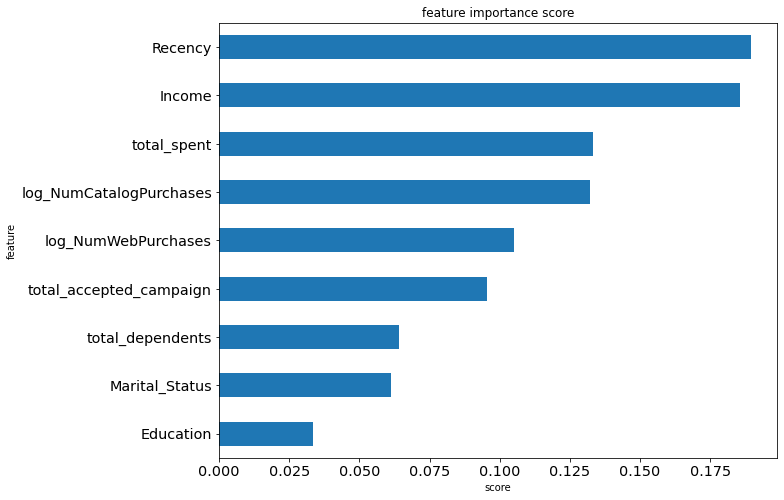

In [ ]:
show_feature_importance(rf)

## Business Insight & Business Recommendation

Berdasarkan hasil visualisasi feature importance sebelumnya, berikut merupakan business insight & recommendation yang dapat kami simpulkan berdasarkan top 3 feature dengan menggunakan model Random Forest..

###### Business Insight I (Income)

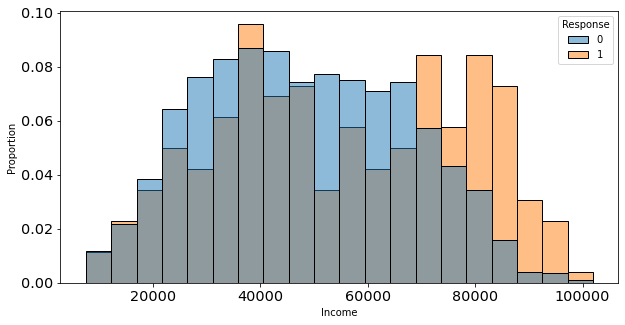

In [ ]:
# Income
plt.figure(figsize = (10,5))
sns.histplot(x='Income', hue = 'Response', data = df_for_corr, stat = 'proportion', common_norm = False)
plt.show()

1. Business Insight. Berdasarkan histogram diatas dapat diketahui bahwa semakin tinggi income pelanggan maka semakin besar kemungkinan pelanggan tersebut untuk merespons campaign yg diberikan. Hal ini bisa dilihat dari jumlah income pelanggan mulai dari 70000 keatas akan cendrung untuk memberikan respons atas campaign yg diberikan.
2. Rekomendasi. Dengan mengetahui bahwa semakin tinggi income yg dimiliki oleh pelanggan akan ada kemungkinan untuk merespons. Maka untuk kedepannya perusahaan bisa memberikan campaign kepada pelanggan yg memiliki income diatas 70000 untuk meningkatkan respons.

###### Business Insight II (Recency)

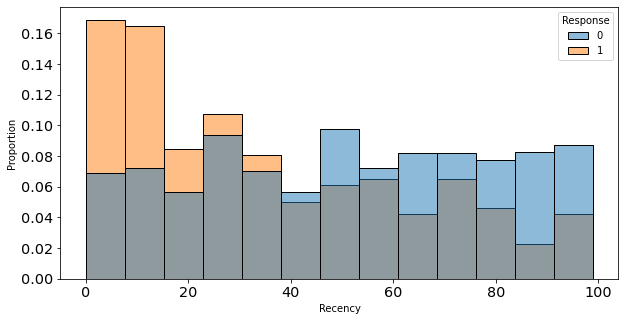

In [ ]:
# recency
plt.figure(figsize = (10,5))
sns.histplot(x='Recency', hue = 'Response', data = df_for_corr, stat = 'proportion', common_norm = False)
plt.show()

In [ ]:
category_recency=[]
for i in df_plot_['Recency']:
  if i <= 7  :
    category_recency.append("<= seminggu")
  elif i <= 14 :
    category_recency.append("<= 14 hari")
  elif i <= 30 :
    category_recency.append("<= sebulan")
  elif i <= 60 :
    category_recency.append("<= 2 bulan")
  else :
    category_recency.append("> 2 bulan")
df_plot_['category_recency'] = category_recency

NameError: ignored

In [ ]:
pd.crosstab(index=df_plot_['Response'], columns=df_plot_['category_recency']).plot(kind="pie", figsize=(16, 8), subplots=True, autopct='%1.2f%%', legend=False)
plt.show()

1. Business Insight. Berdasarkan histogram dan piechart di atas dapat diketahui bahwa semakin kecil recency atau semakin dekat jarak pembelian terakhir yang dilakukan pelanggan akan semakin besar kemungkinan pelanggan untuk response pada campaign yang akan datang
2. Rekomendasi. Dengan mengetahui insight yang sudah dijabarkan pada pada poin 1, maka kedepannya perusahaan bisa memberikan campaign khusus kepada pelanggan yg memiliki kriteria belanja atau melakukan pembelian terakhir pada waktu terdekat dengan campaign yang akan dilaksanakan. Kemudian, perusahaan kedepannya juga harus memiliki concern lebih untuk menjangkau customer-customer yang sudah lama tidak berbelanja dengan membuat campaign dengan diskon atau promo yang lebih menguntungkan bagi customer misalnya.

###### Business Insight III (Total_spent)

In [ ]:
# total spent
plt.figure(figsize = (10,5))
sns.histplot(x='total_spent', hue = 'Response', data = df_for_corr, stat = 'proportion', common_norm = False)
plt.show()

1. Business Insight. Berdasarkan histogram diatas dapat diketahu bahwa semakin tinggi total spent atau total pembelanjaan produk yg dilakukan oleh pelanggan maka semakin tinggi kemungkinan pelanggan tersebut untuk merespons campaign yg diberikan. Hal ini bisa dilihat dari total spent yg jumlahnya diatas 2000 maka tingkat respons terhadap campaign semakin besar.
2. Rekomendasi. Dengan mengetahui bahwa semakin tinggi total spent pelanggan akan meningkatkan respons. Maka kedepannya perusahaan bisa memberikan campaign khusus kepada pelanggan yg memiliki kriteria total spent terbanyak sebelum periode campaign terbaru yang akan dilaksanakan. Kemudian, perusahaan juga perlu meningkatkan total spent pelanggan dengan cara meningkatkan dan menjaga kualitas dari produk yg dijual, misalnya dengan berusaha untuk selalu menawarkan produk fresh pada jenis buah-buahan, ikan, dan daging.

## Simulation

##### **Business Metrics Output**

In [ ]:
# Before modelling
df_for_corr['Response'].value_counts(normalize = True)

0    0.866359
1    0.133641
Name: Response, dtype: float64

In [ ]:
# Model Evaluation: Random Forest
eval_classification(rss)

Accuracy (Train Set): 0.77
Accuracy (Test Set): 0.88
Precision (Train Set): 0.87
Precision (Test Set): 0.58
Recall (Train Set): 0.36
Recall (Test Set): 0.32
F1-Score (Train Set): 0.51
F1-Score (Test Set): 0.41
roc_auc (train-proba): 0.83
roc_auc (test-proba): 0.83
roc_auc (crossval train): 0.8231186475351364
roc_auc (crossval test): 0.8025751872161118


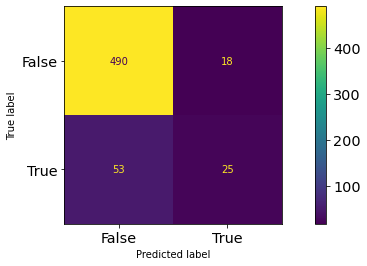

In [ ]:
#Confusion metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix # import package dari sklearn

y_pred = rss.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)#, normalize='all')

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
TP = 25
FP = 18
TN = 490
FN = 53

TP + FP + TN + FN

586

###### Response Rate

In [ ]:
# response_rate is derived from predicted data = 1 (True)
response_rate = (TP/ (TP+FP)) # same as precision
response_rate

0.5813953488372093

Berdasarkan hasil perhitungan di atas, terbukti bahwa dengan menerapkan teknik modelling Random Forest pada machine learning di kasus ini perusahaan mampu meningkatkan response rate dari yang sebelumnya hanya sebesar 14.9 % menjadi 54.3 %.

###### Revenue Rate

In [ ]:
# before model
total_respon = df_for_corr['Response'].value_counts()[1]
revenue = 11
cost = 3
total_cost = len(df) * cost
total_revenue = total_respon * revenue

# revenue_rate_before
revenue_rate_before = ((total_revenue - total_cost)/ total_revenue) *100
revenue_rate_before

-104.07523510971788

In [ ]:
# after model
total_profit = (TP * 11) - ((TP+FP) * 3)
total_revenue = TP * 11

# calculate revenue_rate
revenue_rate_after = (total_profit/ total_revenue) *100
revenue_rate_after

53.090909090909086

Berdasarkan hasil perhitungan di atas, terbukti bahwa dengan menerapkan teknik modelling Random Forest pada machine learning di kasus ini perusahaan mampu meningkatkan revenue rate dari yang sebelumnya merugi sebesar -104.1 % berubah menjadi untung sebesar 49.8 %.